In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['agg.path.chunksize'] = 10000

from tqdm import tqdm


In [2]:
time = pd.read_csv('G:/내 드라이브/취업/Contest/2307_PublicData/data/ground_time_9246057.csv', sep=',', index_col=0)
day = pd.read_csv('G:/내 드라이브/취업/Contest/2307_PublicData/data/groud_day_4089.csv', sep=',', index_col=0)
elec = pd.read_csv('G:/내 드라이브/취업/Contest/2307_PublicData/data/5minute_demand_y_(12.06~).csv', sep=',', index_col=0)

C:\Users\hslio\AppData\Local\Temp\ipykernel_16552\3017416345.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  time = pd.read_csv('G:/내 드라이브/취업/Contest/2307_PublicData/data/ground_time_9246057.csv', sep=',', index_col=0)


In [3]:
# 결측치 확인
def missing_per(df):
    missing_percentages = df.isnull().mean() * 100
    missing_percentages_df = pd.DataFrame({'결측치 비율(%)': missing_percentages})
    
    return missing_percentages_df

# 80% 이상 결측치 컬럼 삭제
def delete_nan_over_80(df):
    threshold = 0.8
    missing_percentages = df.isnull().mean()
    columns_to_drop = missing_percentages[missing_percentages >= threshold].index
    df = df.drop(columns=columns_to_drop)
    return df

# 스타일링 함수
def highlight_cells(value):
    if value >= 80 :  # 특정 값 이상인 경우
        return 'background-color: yellow'
    else:
        return ''
    
# , 제거 함수
def remove_comma(value):
    if isinstance(value, str):
        return value.replace(',', '')
    else:
        return value

# 기준일시 기준 데이터 분포도 확인
def value_confirm(df):
    for column in tqdm(df.columns):
        df[column].plot(figsize=(15,6))
        plt.title(f'{column}_Plot')
        plt.show()
        
        missing_percentages = round(df[column].isnull().mean() * 100, 2)
        print('결측치 비율(%) : ', missing_percentages)
        print()
        print(df[column].value_counts())
        print()
        print(df[column].describe())
        print('='*30)

# nan값 처리 후 4사분위 값 비교
def compare_describe(df1, df2):
    for column in tqdm(df1.columns):
        d1 = df1[[columns]].describe()
        d2 = df2[[columns]].describe()

        res = pd.concat([d1, d2], axis=1)
        display(res)

# Time

In [ ]:
time.info()

In [ ]:
# 154개나 되는 운형 카테고리 data (Drop)

time['운형(운형약어)'].value_counts()

In [4]:
# 문자열 데이터 drop

time.drop(columns = ['운형(운형약어)'], inplace=True)

In [5]:
# 결측치 비율 확인, 80% 이상 노란색

display(missing_per(time).style.applymap(highlight_cells))

In [ ]:
'''
각 컬럼별 설명 

* QC플래그 : 품질검사 정보 0(정상), 1(오류), 9(결측)

'기온(°C)' :
'기온 QC플래그' : 
'강수량(mm)' : 
'강수량 QC플래그' : 
'풍속(m/s)' : 
'풍속 QC플래그' : 
'풍향(16방위)' : 
'풍향 QC플래그' : 
'습도(%)' : 
'습도 QC플래그' : 
    '증기압(hPa)' : 
    '이슬점온도(°C)' : 
    '현지기압(hPa)' : 
'현지기압 QC플래그' : 
'해면기압(hPa)' : 
'해면기압 QC플래그' :
'일조(hr)' :
'일조 QC플래그' :
'일사(MJ/m2)' :
'일사 QC플래그' :
    '적설(cm)' :
    '3시간신적설(cm)' :
    '전운량(10분위)' :
    '중하층운량(10분위)' :
    '운형(운형약어)' : 구름 형태에 따라 문자형으로 분류, 152종류나 있고 각 카테고리별 정확한 정보를 파악할 수 없음 (Drop)
    '최저운고(100m )' :
    '시정(10m)' :
    '지면상태(지면상태코드)' :
    '현상번호(국내식)' :
'지면온도(°C)' :
'지면온도 QC플래그' :
    '5cm 지중온도(°C)' :
    '10cm 지중온도(°C)' :
    '20cm 지중온도(°C)' :
    '30cm 지중온도(°C)' :

'''

  0%|                                                                         | 0/34 [00:00<?, ?it/s]

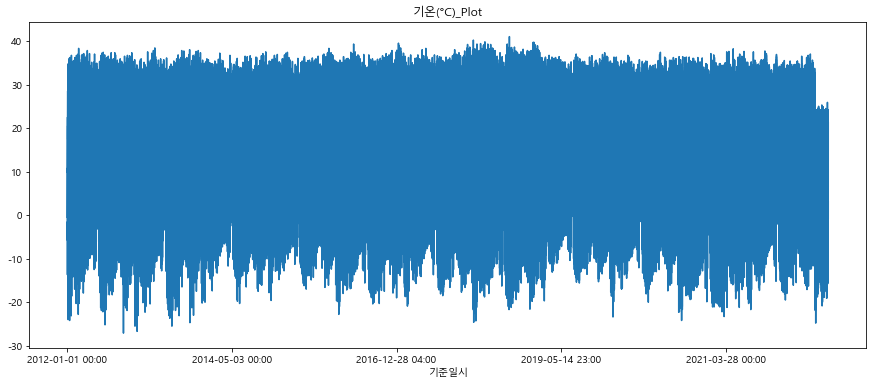

결측치 비율(%) :  0.05

 20.7    35110
 21.5    35106
 22.2    34967
 21.8    34938
 22.7    34869
         ...  
-26.5        1
 39.8        1
 40.1        1
-25.3        1
 41.0        1
Name: 기온(°C), Length: 659, dtype: int64



  3%|█▉                                                               | 1/34 [00:02<01:27,  2.64s/it]

count    9.241854e+06
mean     1.297944e+01
std      1.033423e+01
min     -2.710000e+01
25%      4.700000e+00
50%      1.380000e+01
75%      2.160000e+01
max      4.100000e+01
Name: 기온(°C), dtype: float64


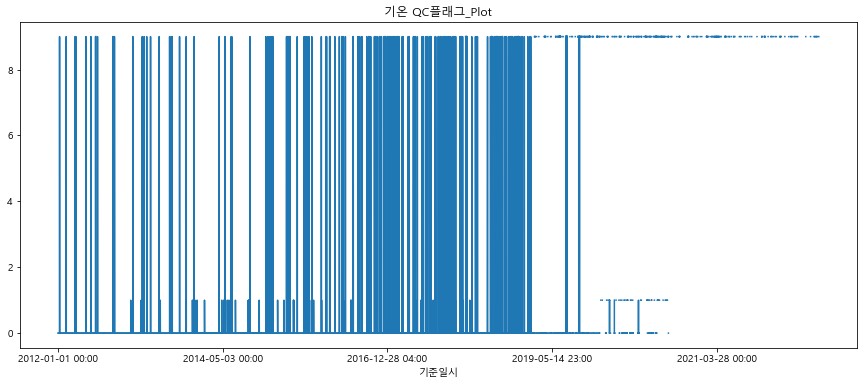

결측치 비율(%) :  38.95

0.0    5640086
9.0       4000
1.0        337
Name: 기온 QC플래그, dtype: int64



  6%|███▊                                                             | 2/34 [00:04<01:16,  2.38s/it]

count    5.644423e+06
mean     6.437682e-03
std      2.396248e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.000000e+00
Name: 기온 QC플래그, dtype: float64


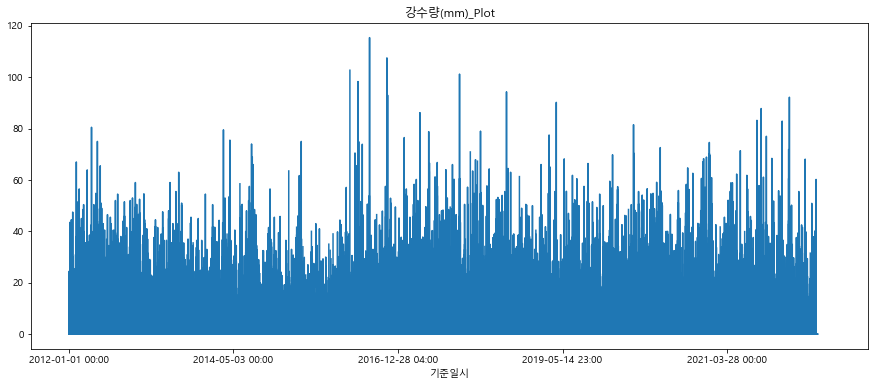

결측치 비율(%) :  90.99

0.0     277393
0.5      75249
0.1      64471
0.2      36938
1.0      36653
         ...  
54.3         1
51.9         1
98.3         1
54.0         1
76.0         1
Name: 강수량(mm), Length: 659, dtype: int64



  9%|█████▋                                                           | 3/34 [00:06<01:10,  2.28s/it]

count    833185.000000
mean          1.588573
std           3.584634
min           0.000000
25%           0.000000
50%           0.400000
75%           1.500000
max         115.400000
Name: 강수량(mm), dtype: float64


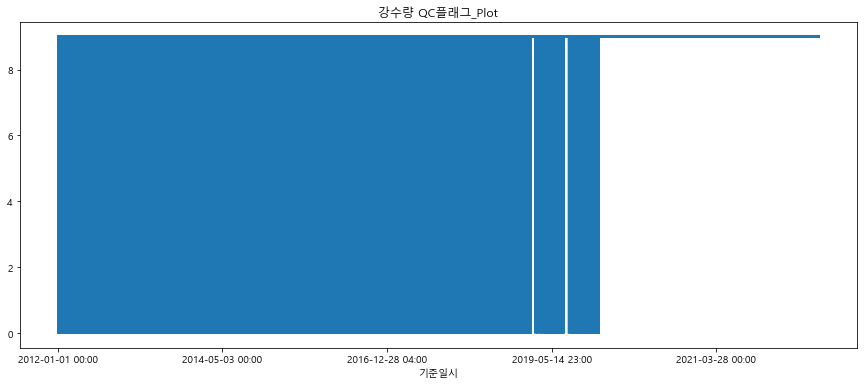

결측치 비율(%) :  77.4

9.0    1591465
0.0     498297
Name: 강수량 QC플래그, dtype: int64



 12%|███████▋                                                         | 4/34 [00:09<01:13,  2.46s/it]

count    2.089762e+06
mean     6.853979e+00
std      3.835204e+00
min      0.000000e+00
25%      9.000000e+00
50%      9.000000e+00
75%      9.000000e+00
max      9.000000e+00
Name: 강수량 QC플래그, dtype: float64


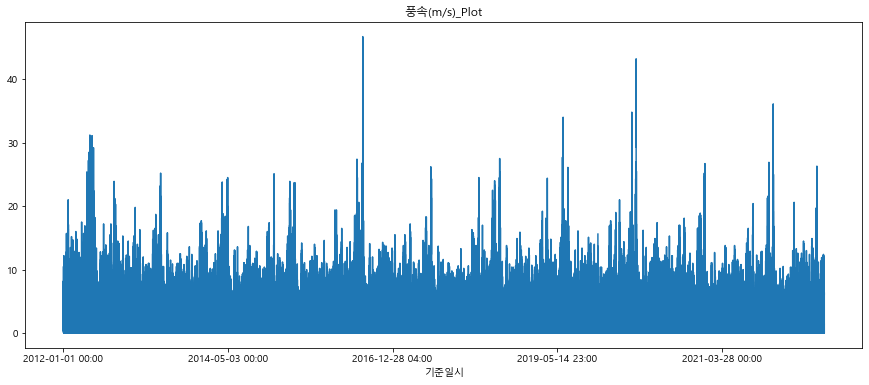

결측치 비율(%) :  0.1

0.0     376925
0.7     304219
0.6     303454
0.8     303019
0.5     298753
         ...  
26.8         1
27.2         1
28.5         1
28.0         1
34.9         1
Name: 풍속(m/s), Length: 300, dtype: int64



 15%|█████████▌                                                       | 5/34 [00:12<01:10,  2.43s/it]

count    9.236444e+06
mean     2.035393e+00
std      1.815808e+00
min      0.000000e+00
25%      7.000000e-01
50%      1.600000e+00
75%      2.800000e+00
max      4.670000e+01
Name: 풍속(m/s), dtype: float64


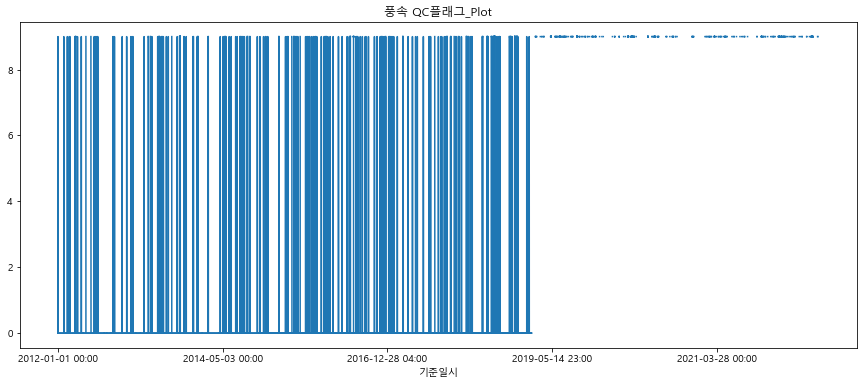

결측치 비율(%) :  40.31

0.0    5513993
9.0       4936
Name: 풍속 QC플래그, dtype: int64



 18%|███████████▍                                                     | 6/34 [00:14<01:04,  2.31s/it]

count    5.518929e+06
mean     8.049388e-03
std      2.690348e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.000000e+00
Name: 풍속 QC플래그, dtype: float64


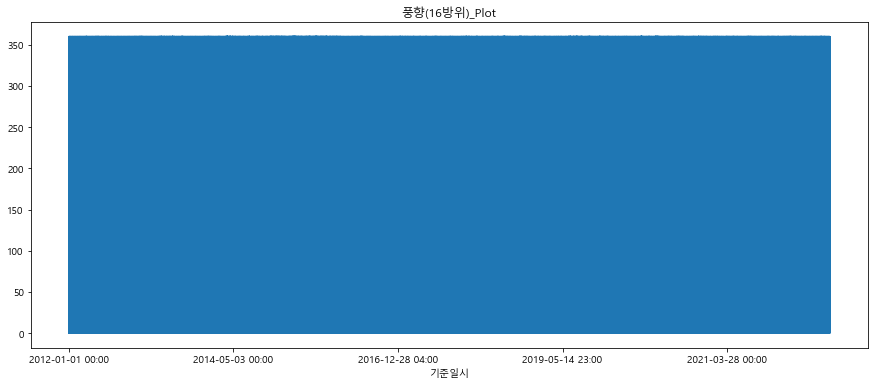

결측치 비율(%) :  0.23

0.0      1444287
290.0     740009
270.0     693673
320.0     665206
250.0     565542
340.0     553931
230.0     485612
360.0     477511
50.0      473481
20.0      465217
200.0     406739
70.0      399231
180.0     382709
110.0     374533
90.0      374532
160.0     365559
140.0     356822
32.0          43
34.0          34
27.0          34
25.0          24
29.0          23
23.0          20
18.0          19
36.0          18
2.0           18
5.0           15
14.0          12
16.0          11
11.0          10
9.0           10
7.0            9
Name: 풍향(16방위), dtype: int64



 21%|█████████████▍                                                   | 7/34 [00:16<01:04,  2.39s/it]

count    9.224894e+06
mean     1.758931e+02
std      1.224799e+02
min      0.000000e+00
25%      5.000000e+01
50%      1.800000e+02
75%      2.900000e+02
max      3.600000e+02
Name: 풍향(16방위), dtype: float64


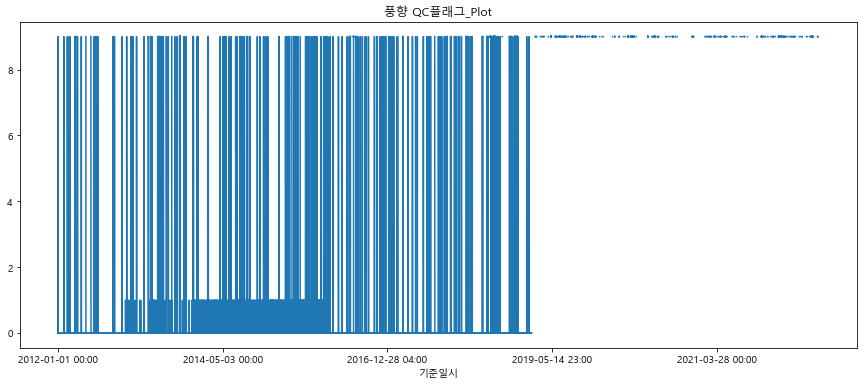

결측치 비율(%) :  40.31

0.0    5502783
1.0      10979
9.0       5508
Name: 풍향 QC플래그, dtype: int64



 24%|███████████████▎                                                 | 8/34 [00:18<00:59,  2.30s/it]

count    5.519270e+06
mean     1.097083e-02
std      2.875821e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.000000e+00
Name: 풍향 QC플래그, dtype: float64


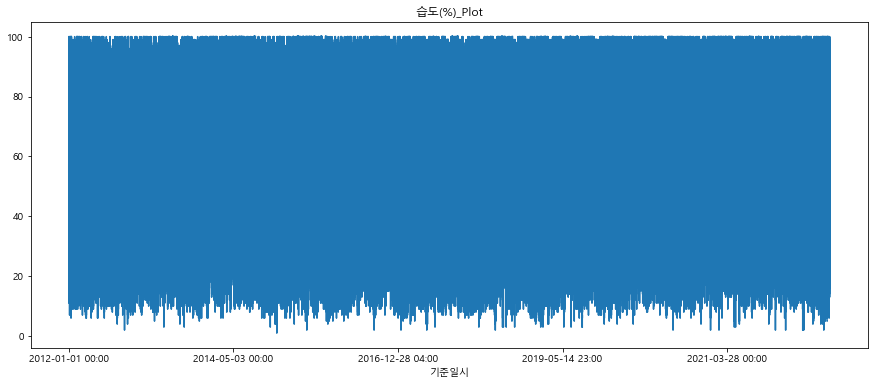

결측치 비율(%) :  0.12

99.0     224098
100.0    195028
98.0     186765
97.0     178882
95.0     177226
          ...  
80.1          1
81.8          1
25.2          1
16.3          1
45.5          1
Name: 습도(%), Length: 553, dtype: int64



 26%|█████████████████▏                                               | 9/34 [00:21<00:58,  2.33s/it]

count    9.235265e+06
mean     6.870131e+01
std      2.181941e+01
min      1.000000e+00
25%      5.300000e+01
50%      7.100000e+01
75%      8.800000e+01
max      1.000000e+02
Name: 습도(%), dtype: float64


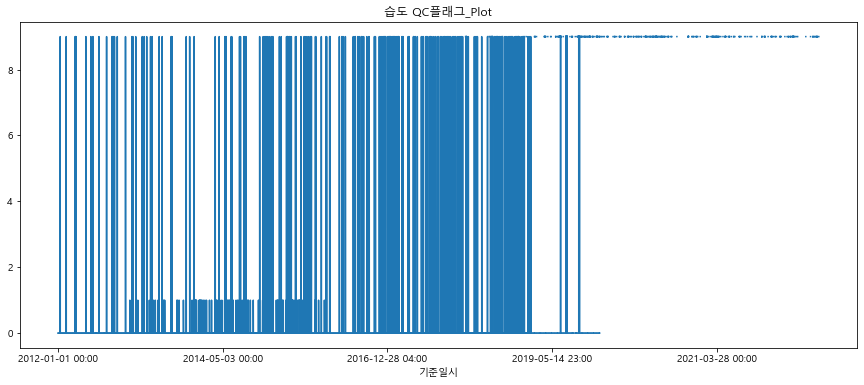

결측치 비율(%) :  38.97

0.0    5631531
9.0       7776
1.0       3140
Name: 습도 QC플래그, dtype: int64



 29%|██████████████████▊                                             | 10/34 [00:23<00:56,  2.37s/it]

count    5.642447e+06
mean     1.295963e-02
std      3.346890e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.000000e+00
Name: 습도 QC플래그, dtype: float64


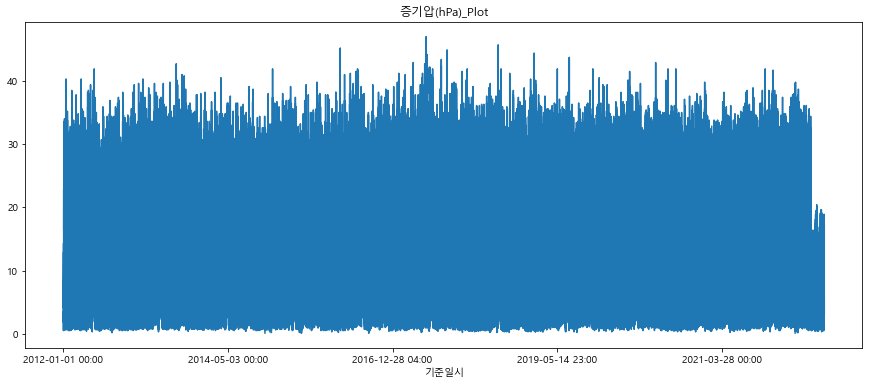

결측치 비율(%) :  0.09

4.2     85929
3.8     80206
3.6     74626
5.8     74624
3.0     73953
        ...  
46.2        1
47.0        1
45.4        1
44.9        1
45.7        1
Name: 증기압(hPa), Length: 335, dtype: int64



 32%|████████████████████▋                                           | 11/34 [00:26<00:56,  2.45s/it]

count    9.237896e+06
mean     1.246612e+01
std      8.627456e+00
min      1.000000e-01
25%      5.100000e+00
50%      1.010000e+01
75%      1.900000e+01
max      4.700000e+01
Name: 증기압(hPa), dtype: float64


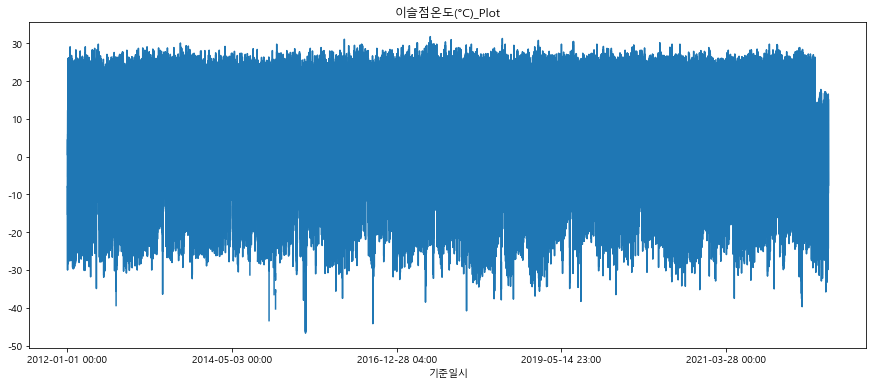

결측치 비율(%) :  0.11

 0.0     47517
 19.1    29335
 18.3    29320
 17.8    29295
 18.9    29271
         ...  
-46.7        1
-46.3        1
 31.0        1
-40.8        1
-38.9        1
Name: 이슬점온도(°C), Length: 708, dtype: int64



 35%|██████████████████████▌                                         | 12/34 [00:29<00:55,  2.54s/it]

count    9.235586e+06
mean     6.536469e+00
std      1.169154e+01
min     -4.670000e+01
25%     -2.500000e+00
50%      7.100000e+00
75%      1.670000e+01
max      3.180000e+01
Name: 이슬점온도(°C), dtype: float64


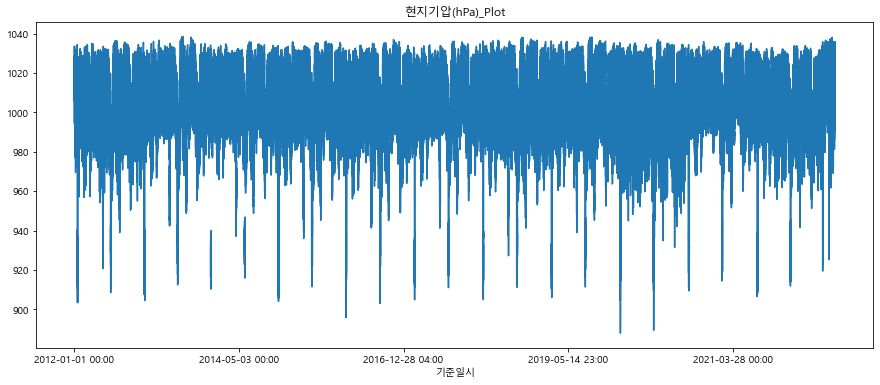

결측치 비율(%) :  0.1

1005.7    30937
1005.5    30630
1006.2    30558
1005.9    30478
1005.0    30459
          ...  
901.0         1
904.8         1
903.1         1
905.5         1
897.8         1
Name: 현지기압(hPa), Length: 1404, dtype: int64



 38%|████████████████████████▍                                       | 13/34 [00:31<00:52,  2.49s/it]

count    9.236597e+06
mean     1.003842e+03
std      1.686740e+01
min      8.880000e+02
25%      9.977000e+02
50%      1.006500e+03
75%      1.014600e+03
max      1.038500e+03
Name: 현지기압(hPa), dtype: float64


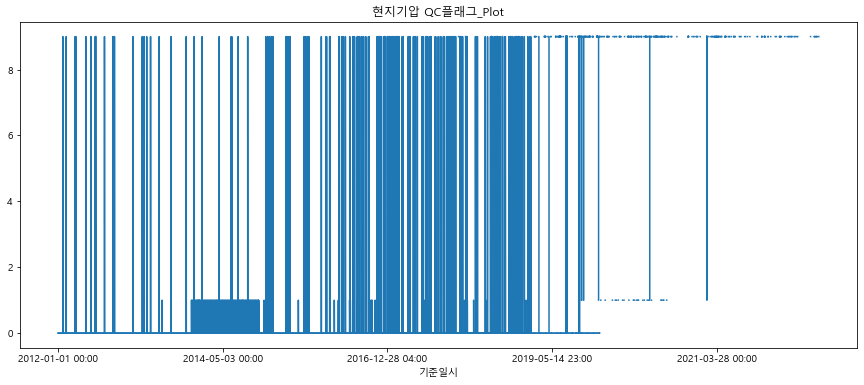

결측치 비율(%) :  38.98

0.0    5632022
1.0       4895
9.0       4716
Name: 현지기압 QC플래그, dtype: int64



 41%|██████████████████████████▎                                     | 14/34 [00:33<00:47,  2.39s/it]

count    5.641633e+06
mean     8.391010e-03
std      2.617393e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.000000e+00
Name: 현지기압 QC플래그, dtype: float64


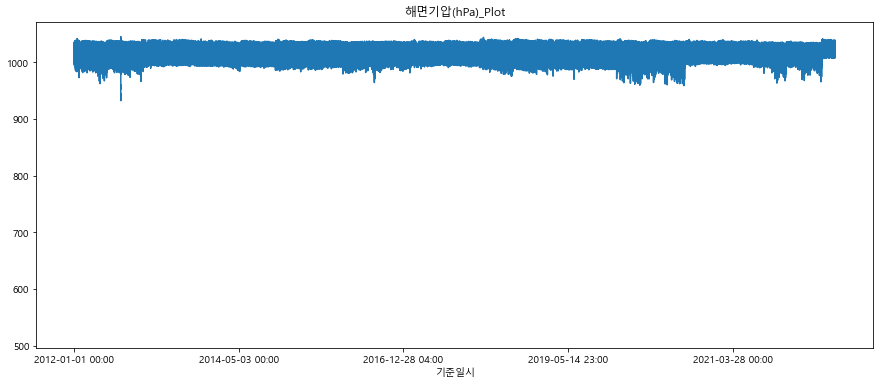

결측치 비율(%) :  0.06

1020.7    38162
1020.2    38105
1020.5    38097
1020.6    38071
1021.2    38004
          ...  
1044.1        1
1043.8        1
1043.5        1
1043.0        1
965.7         1
Name: 해면기압(hPa), Length: 810, dtype: int64



 44%|████████████████████████████▏                                   | 15/34 [00:35<00:45,  2.37s/it]

count    9.240845e+06
mean     1.016476e+03
std      8.265006e+00
min      5.225000e+02
25%      1.010000e+03
50%      1.016700e+03
75%      1.022900e+03
max      1.045400e+03
Name: 해면기압(hPa), dtype: float64


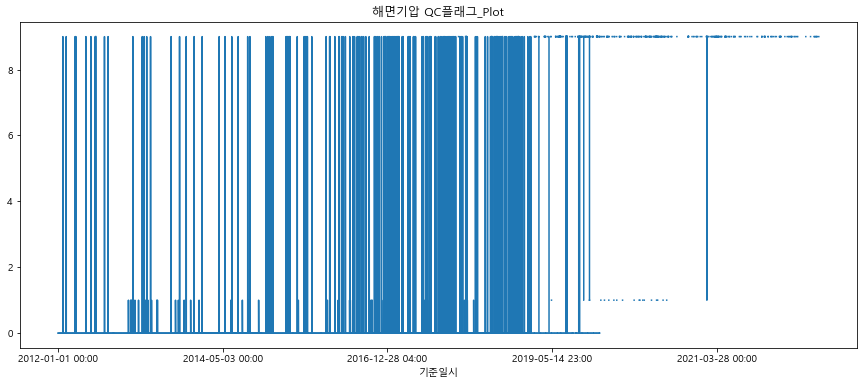

결측치 비율(%) :  38.98

0.0    5636527
9.0       5039
1.0        322
Name: 해면기압 QC플래그, dtype: int64



 47%|██████████████████████████████                                  | 16/34 [00:38<00:41,  2.32s/it]

count    5.641888e+06
mean     8.095340e-03
std      2.689534e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.000000e+00
Name: 해면기압 QC플래그, dtype: float64


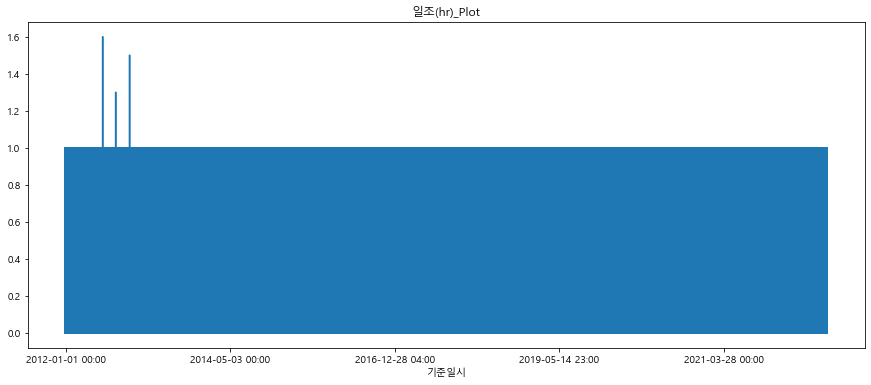

결측치 비율(%) :  45.78

0.00    1917627
1.00    1651566
0.90     222279
0.10     200105
0.80     169729
0.20     156427
0.70     147904
0.30     141328
0.60     138079
0.50     134266
0.40     133753
1.60          1
1.30          1
1.50          1
0.25          1
Name: 일조(hr), dtype: int64



 50%|████████████████████████████████                                | 17/34 [00:44<01:01,  3.64s/it]

count    5.013067e+06
mean     4.763778e-01
std      4.467927e-01
min      0.000000e+00
25%      0.000000e+00
50%      4.000000e-01
75%      1.000000e+00
max      1.600000e+00
Name: 일조(hr), dtype: float64


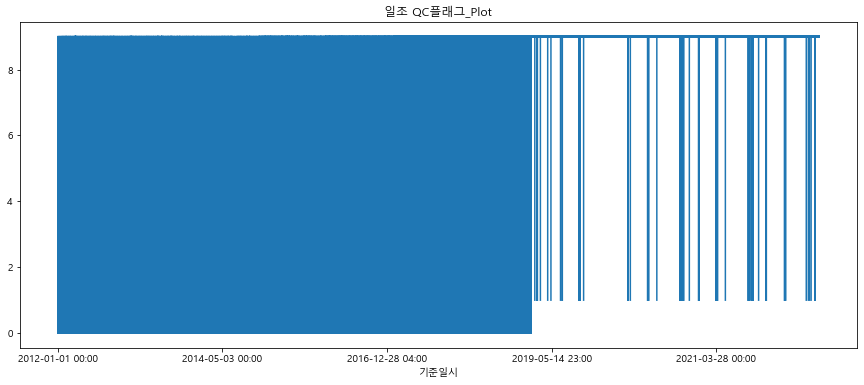

결측치 비율(%) :  22.08

9.0    4201582
0.0    2976611
1.0      26768
Name: 일조 QC플래그, dtype: int64



 53%|█████████████████████████████████▉                              | 18/34 [00:47<00:52,  3.27s/it]

count    7.204961e+06
mean     5.252076e+00
std      4.433358e+00
min      0.000000e+00
25%      0.000000e+00
50%      9.000000e+00
75%      9.000000e+00
max      9.000000e+00
Name: 일조 QC플래그, dtype: float64


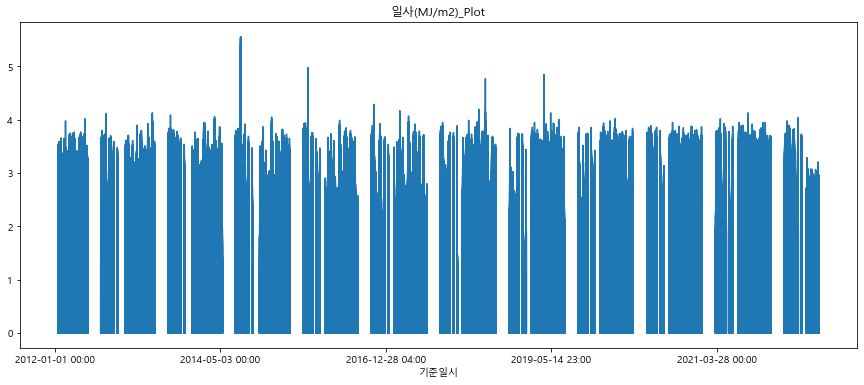

결측치 비율(%) :  76.03

0.00    141196
0.01     57680
0.02     39704
0.03     31248
0.04     26717
         ...  
5.46         1
5.55         1
5.19         1
5.56         1
4.85         1
Name: 일사(MJ/m2), Length: 518, dtype: int64



 56%|███████████████████████████████████▊                            | 19/34 [00:51<00:52,  3.53s/it]

count    2.216224e+06
mean     1.062808e+00
std      9.609261e-01
min      0.000000e+00
25%      2.000000e-01
50%      8.100000e-01
75%      1.760000e+00
max      5.560000e+00
Name: 일사(MJ/m2), dtype: float64


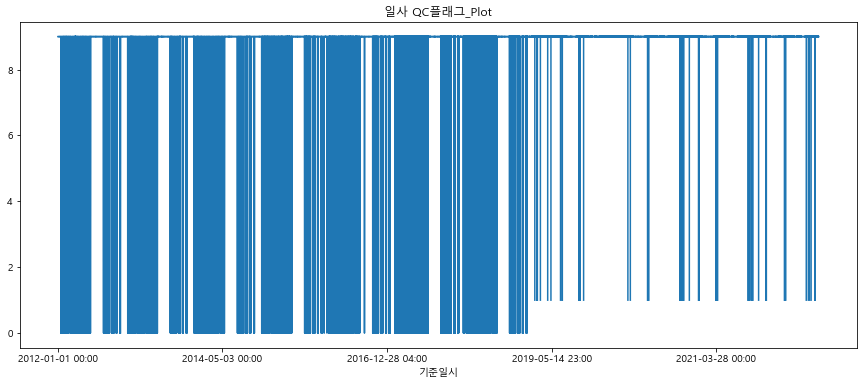

결측치 비율(%) :  10.53

9.0    7024974
0.0    1247350
1.0        177
Name: 일사 QC플래그, dtype: int64



 59%|█████████████████████████████████████▋                          | 20/34 [00:53<00:44,  3.16s/it]

count    8.272501e+06
mean     7.642785e+00
std      3.220673e+00
min      0.000000e+00
25%      9.000000e+00
50%      9.000000e+00
75%      9.000000e+00
max      9.000000e+00
Name: 일사 QC플래그, dtype: float64


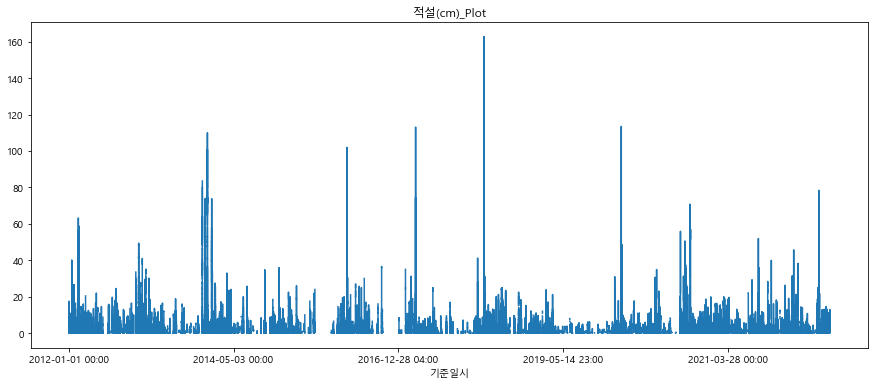

결측치 비율(%) :  98.02

0.5      7567
1.0      5754
2.0      4658
0.4      4572
1.5      4269
         ... 
104.6       1
106.7       1
106.8       1
108.0       1
63.6        1
Name: 적설(cm), Length: 978, dtype: int64



 62%|███████████████████████████████████████▌                        | 21/34 [00:55<00:36,  2.81s/it]

count    182973.000000
mean          6.045943
std           9.810201
min           0.000000
25%           1.200000
50%           3.100000
75%           6.700000
max         162.800000
Name: 적설(cm), dtype: float64


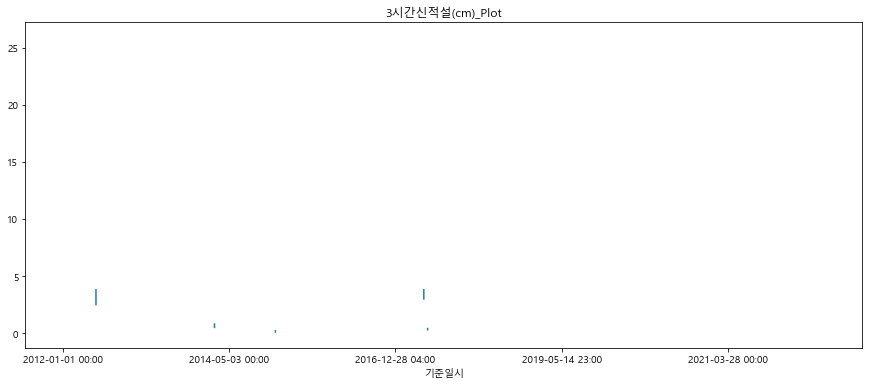

결측치 비율(%) :  99.87

0.0     2753
0.1     1240
0.2     1001
0.5      791
0.3      728
        ... 
8.1        1
10.7       1
12.1       1
13.5       1
15.3       1
Name: 3시간신적설(cm), Length: 137, dtype: int64



 65%|█████████████████████████████████████████▍                      | 22/34 [00:57<00:30,  2.54s/it]

count    11859.000000
mean         1.036934
std          1.759943
min          0.000000
25%          0.100000
50%          0.400000
75%          1.200000
max         26.000000
Name: 3시간신적설(cm), dtype: float64


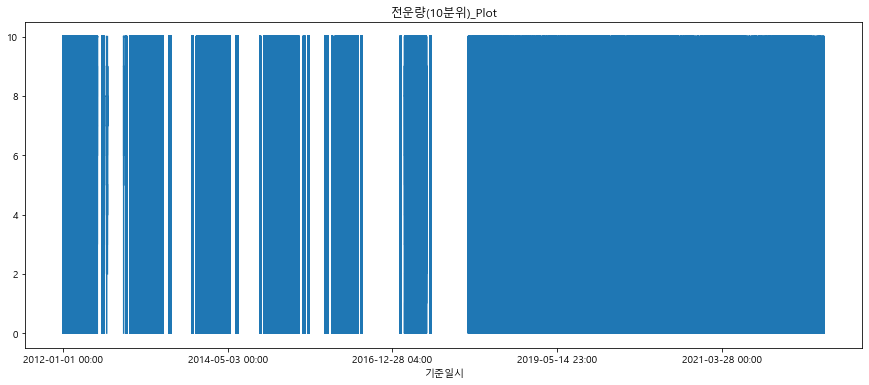

결측치 비율(%) :  44.18

0.0     1312032
10.0    1050808
9.0      489897
8.0      478011
7.0      405790
6.0      349526
5.0      240217
3.0      233474
4.0      217057
2.0      196540
1.0      187920
Name: 전운량(10분위), dtype: int64



 68%|███████████████████████████████████████████▎                    | 23/34 [01:00<00:29,  2.69s/it]

count    5.161272e+06
mean     5.237016e+00
std      3.907886e+00
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+00
75%      9.000000e+00
max      1.000000e+01
Name: 전운량(10분위), dtype: float64


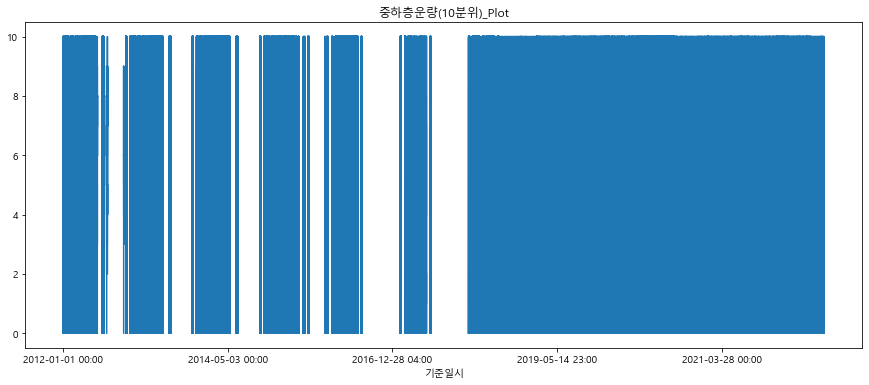

결측치 비율(%) :  43.76

0.0     2304440
8.0      349456
9.0      343060
7.0      330761
6.0      299079
1.0      298442
2.0      287130
3.0      285336
4.0      254967
5.0      242153
10.0     204958
Name: 중하층운량(10분위), dtype: int64



 71%|█████████████████████████████████████████████▏                  | 24/34 [01:03<00:27,  2.70s/it]

count    5.199782e+06
mean     3.077420e+00
std      3.467689e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      6.000000e+00
max      1.000000e+01
Name: 중하층운량(10분위), dtype: float64


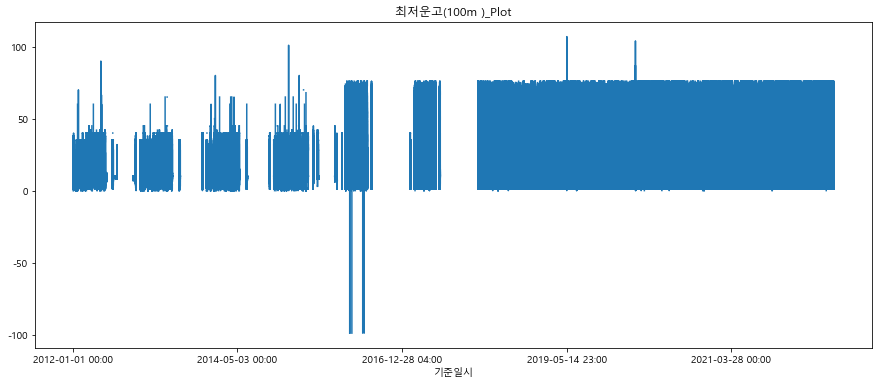

결측치 비율(%) :  70.64

10.0     590920
8.0      237041
7.0      127526
9.0      122418
2.0      120385
          ...  
101.0         1
107.0         1
87.0          1
104.0         1
77.0          1
Name: 최저운고(100m ), Length: 85, dtype: int64



 74%|███████████████████████████████████████████████                 | 25/34 [01:06<00:24,  2.71s/it]

count    2.714705e+06
mean     1.566823e+01
std      1.599283e+01
min     -9.900000e+01
25%      7.000000e+00
50%      1.000000e+01
75%      1.500000e+01
max      1.070000e+02
Name: 최저운고(100m ), dtype: float64


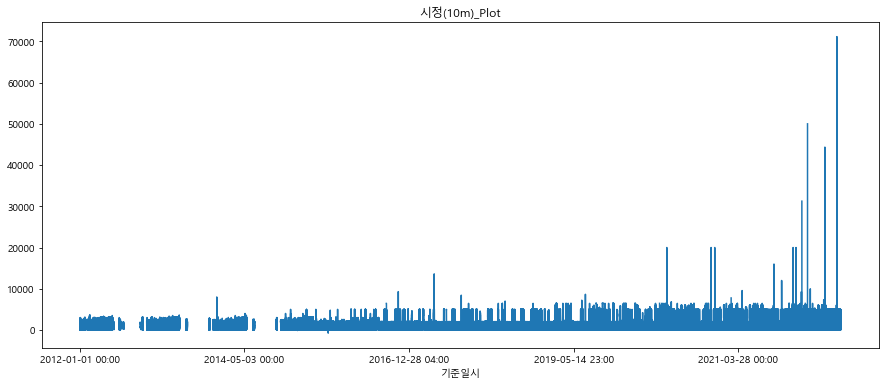

결측치 비율(%) :  20.07

2000.0     2126780
1500.0      133451
5000.0      127105
1800.0      113455
1200.0      101860
            ...   
5771.0           1
5922.0           1
5710.0           1
5760.0           1
71160.0          1
Name: 시정(10m), Length: 6077, dtype: int64



 76%|████████████████████████████████████████████████▉               | 26/34 [01:08<00:20,  2.61s/it]

count    7.390164e+06
mean     1.736582e+03
std      1.033686e+03
min     -7.650000e+02
25%      1.072000e+03
50%      1.877000e+03
75%      2.000000e+03
max      7.116000e+04
Name: 시정(10m), dtype: float64


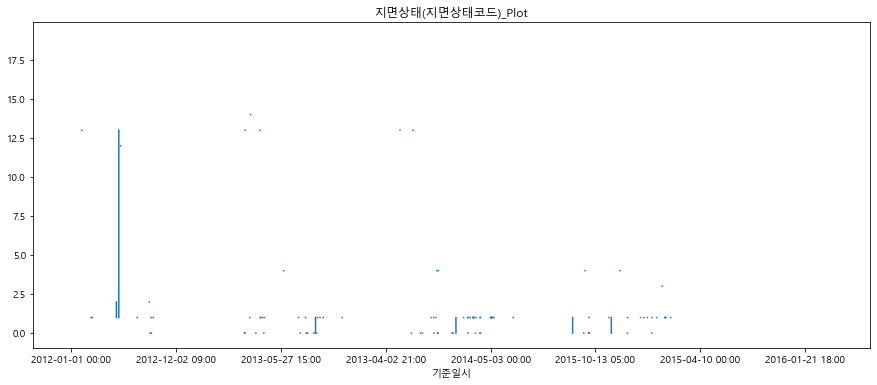

결측치 비율(%) :  97.48

1.0     103650
0.0      99623
4.0      12615
13.0      5041
2.0       3484
11.0      1939
12.0      1875
19.0      1579
14.0       841
17.0       700
3.0        451
16.0       363
15.0       253
18.0       164
5.0          4
10.0         1
Name: 지면상태(지면상태코드), dtype: int64



 79%|██████████████████████████████████████████████████▊             | 27/34 [01:10<00:16,  2.39s/it]

count    232583.000000
mean          1.453473
std           3.164457
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          19.000000
Name: 지면상태(지면상태코드), dtype: float64


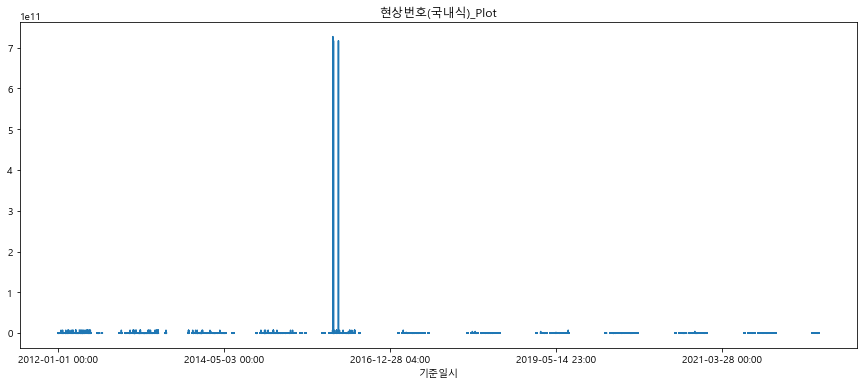

결측치 비율(%) :  91.16

1.900000e+01    304557
1.000000e+00    137466
1.901000e+03    120768
4.000000e+01    102063
1.600000e+01     20104
                 ...  
7.008061e+09         1
4.219061e+09         1
7.140100e+07         1
4.219040e+05         1
1.206050e+07         1
Name: 현상번호(국내식), Length: 463, dtype: int64



 82%|████████████████████████████████████████████████████▋           | 28/34 [01:12<00:13,  2.27s/it]

count    8.171790e+05
mean     3.818429e+06
std      1.383082e+09
min      0.000000e+00
25%      1.600000e+01
50%      1.900000e+01
75%      4.200000e+01
max      7.271702e+11
Name: 현상번호(국내식), dtype: float64


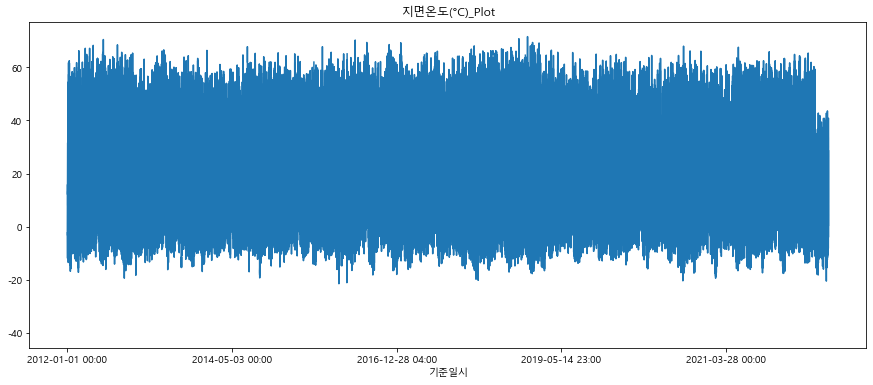

결측치 비율(%) :  0.11

 0.0     65532
-0.1     57707
 0.1     57309
-0.2     56315
-0.3     50925
         ...  
-40.1        1
-39.6        1
-21.1        1
 68.8        1
 70.5        1
Name: 지면온도(°C), Length: 915, dtype: int64



 85%|██████████████████████████████████████████████████████▌         | 29/34 [01:14<00:11,  2.33s/it]

count    9.235758e+06
mean     1.503866e+01
std      1.255059e+01
min     -4.010000e+01
25%      4.300000e+00
50%      1.490000e+01
75%      2.390000e+01
max      7.160000e+01
Name: 지면온도(°C), dtype: float64


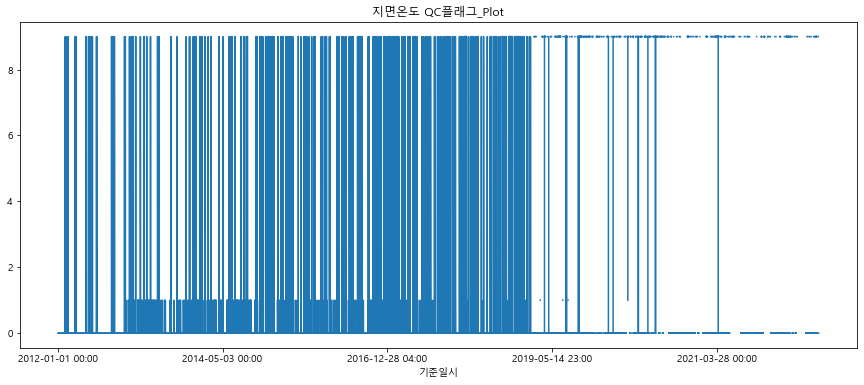

결측치 비율(%) :  38.75

0.0    5652926
9.0       8685
1.0       1907
Name: 지면온도 QC플래그, dtype: int64



 88%|████████████████████████████████████████████████████████▍       | 30/34 [01:16<00:09,  2.27s/it]

count    5.663518e+06
mean     1.413821e-02
std      3.526334e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.000000e+00
Name: 지면온도 QC플래그, dtype: float64


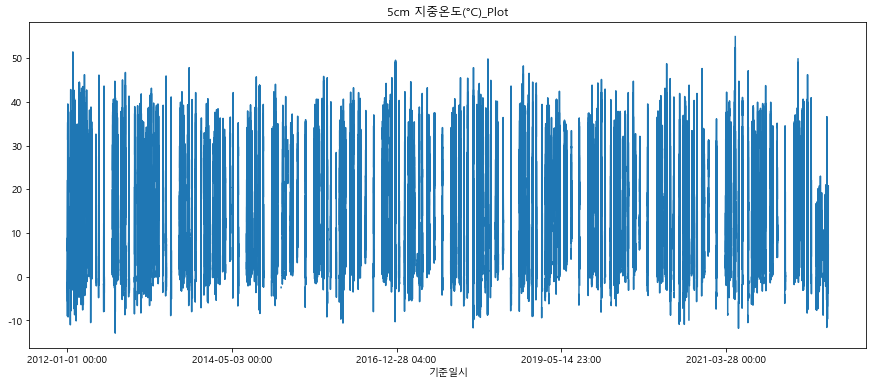

결측치 비율(%) :  69.75

 0.0     17804
 0.1     16095
-0.1     15864
-0.2     15195
 0.2     15176
         ...  
-12.1        1
-12.9        1
 51.4        1
 50.5        1
-11.8        1
Name: 5cm 지중온도(°C), Length: 633, dtype: int64



 91%|██████████████████████████████████████████████████████████▎     | 31/34 [01:19<00:06,  2.21s/it]

count    2.797001e+06
mean     1.501111e+01
std      1.018619e+01
min     -1.290000e+01
25%      5.900000e+00
50%      1.540000e+01
75%      2.370000e+01
max      5.490000e+01
Name: 5cm 지중온도(°C), dtype: float64


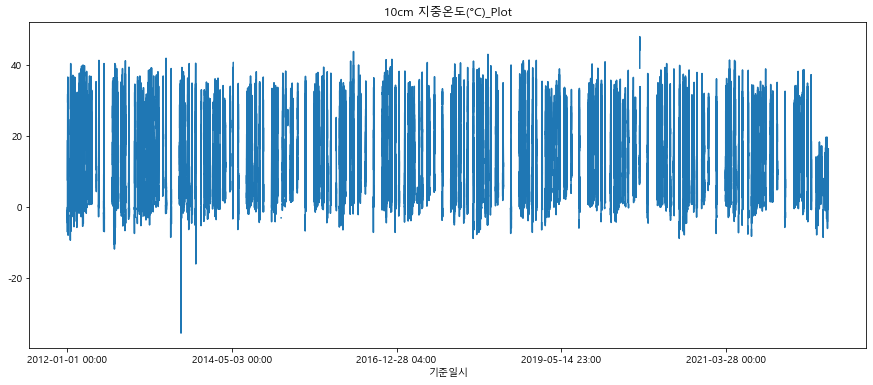

결측치 비율(%) :  69.75

-0.2     16023
-0.1     15399
 0.0     15119
 23.7    13324
 24.2    12815
         ...  
-9.5         1
-10.1        1
-11.1        1
-11.9        1
 44.2        1
Name: 10cm 지중온도(°C), Length: 543, dtype: int64



 94%|████████████████████████████████████████████████████████████▏   | 32/34 [01:21<00:04,  2.16s/it]

count    2.796735e+06
mean     1.499555e+01
std      9.803677e+00
min     -3.560000e+01
25%      6.100000e+00
50%      1.550000e+01
75%      2.360000e+01
max      4.800000e+01
Name: 10cm 지중온도(°C), dtype: float64


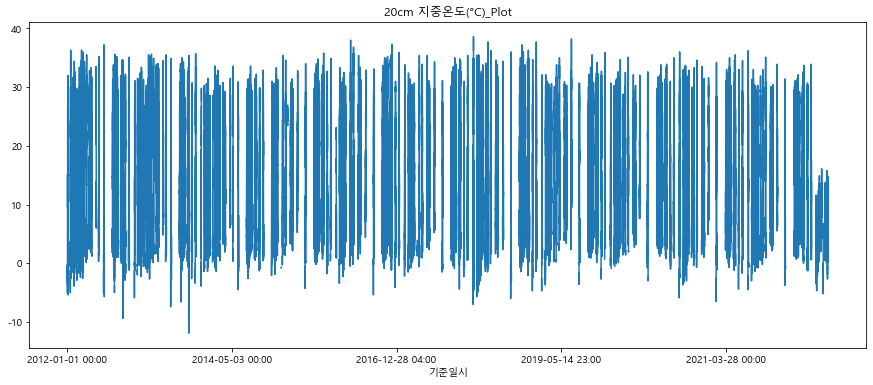

결측치 비율(%) :  69.73

 23.7    14844
 24.7    14782
 24.2    14572
 24.0    14482
 24.1    14383
         ...  
-9.6         1
-8.1         1
-7.6         1
-9.4         1
 38.2        1
Name: 20cm 지중온도(°C), Length: 479, dtype: int64



 97%|██████████████████████████████████████████████████████████████  | 33/34 [01:23<00:02,  2.15s/it]

count    2.799107e+06
mean     1.513231e+01
std      9.320993e+00
min     -1.190000e+01
25%      6.600000e+00
50%      1.560000e+01
75%      2.350000e+01
max      3.860000e+01
Name: 20cm 지중온도(°C), dtype: float64


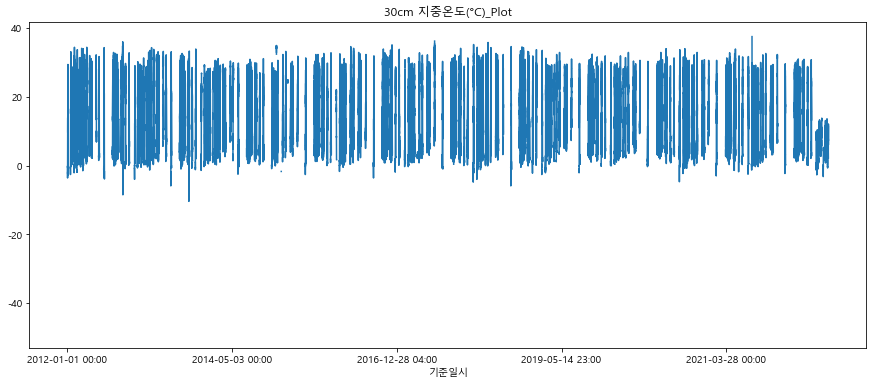

결측치 비율(%) :  69.73

 23.7    16151
 24.7    15857
 23.8    15559
 24.2    15478
 24.3    15184
         ...  
-24.4        1
-10.0        1
-48.7        1
-47.1        1
 37.5        1
Name: 30cm 지중온도(°C), Length: 470, dtype: int64



100%|████████████████████████████████████████████████████████████████| 34/34 [01:25<00:00,  2.51s/it]

count    2.798753e+06
mean     1.518777e+01
std      8.952092e+00
min     -4.870000e+01
25%      6.900000e+00
50%      1.560000e+01
75%      2.330000e+01
max      3.750000e+01
Name: 30cm 지중온도(°C), dtype: float64


In [6]:
value_confirm(time)

# Day

In [7]:
# 결측치 비율 확인, 80% 이상 노란색

display(missing_per(day).style.applymap(highlight_cells))

In [ ]:
'''
각 컬럼별 설명 


'기준일시' : 
'일 평균 풍속 (m/s)' : 
'일 풍정 (m)' : 
'최대풍향' : 
'최대풍속 (m/s)' : 
'최대순간풍향' : 
'최대순간풍속 (m/s)' : 
'일 평균기온 (C)' : 
'최고기온 (C)' : 
'최저기온 (C)' : 
'일 평균 이슬점온도 (C)' : 
'일 평균 지면온도 (C)' : 
'일 최저 초상온도 (C)' : 
'일 평균 상대습도 (%)' : 
'최저습도 (%)' : 
'일 평균 수증기압 (hPa)' : 
'소형 증발량 (mm)' : 
'대형 증발량 (mm)' : 
'안개계속시간 (hr)' : 
'일 평균 현지기압 (hPa)' : 
'일 평균 해면기압 (hPa)' : 
'최고 해면기압 (hPa)' : 
'최고 해면기압 시각 (시분)' : 
'최저 해면기압 (hPa)' : 
'일 평균 전운량 (1/10)' : 
'일조합 (hr)' : 
'가조시간 (hr)' : 
'캄벨 일조 (hr)' : 
'일사합 (MJ/m2)' : 
'최대 1시간일사 (MJ/m2)' : 
'최대 1시간일사 시각 (시분)' : 
'일 강수량 (mm)' : 
'9-9 강수량 (mm)' : 
'강수계속시간 (hr)' : 
'1시간 최다강수량 (mm)' : 
'1시간 최다강수량 시각 (시분)' : 
'10분간 최다강수량 (mm)' : 
'10분간 최다강수량 시각 (시분)' : 
'최대 강우강도 (mm/h)' : 
'최대 강우강도 시각 (시분)' : 
'최심 신적설 (cm)' : 
'최심 신적설 시각 (시분)' : 
'최심 적설 (cm)' : 
'최심 적설 시각 (시분)' : 
'0.5m 지중온도 (C) ' : 
'1.0m 지중온도 (C)' : 
'1.5m 지중온도 (C)' : 
'3.0m 지중온도 (C)' : 
'5.0m 지중온도 (C)' : 


'''

  0%|                                                                         | 0/48 [00:00<?, ?it/s]

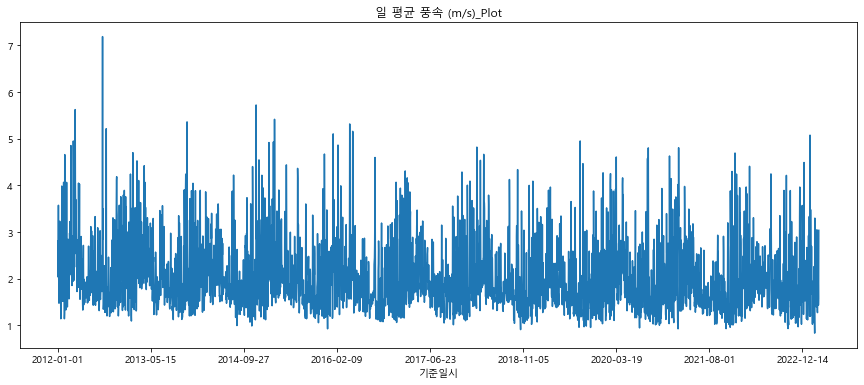

  2%|█▎                                                               | 1/48 [00:00<00:12,  3.87it/s]

결측치 비율(%) :  0.0

1.600000    5
1.622105    5
1.661053    5
1.444211    5
1.389474    5
           ..
2.138710    1
1.381720    1
1.505435    1
1.646739    1
3.037113    1
Name: 일 평균 풍속 (m/s), Length: 3167, dtype: int64

count    4089.000000
mean        2.032030
std         0.716868
min         0.836458
25%         1.523913
50%         1.854348
75%         2.371579
max         7.186957
Name: 일 평균 풍속 (m/s), dtype: float64


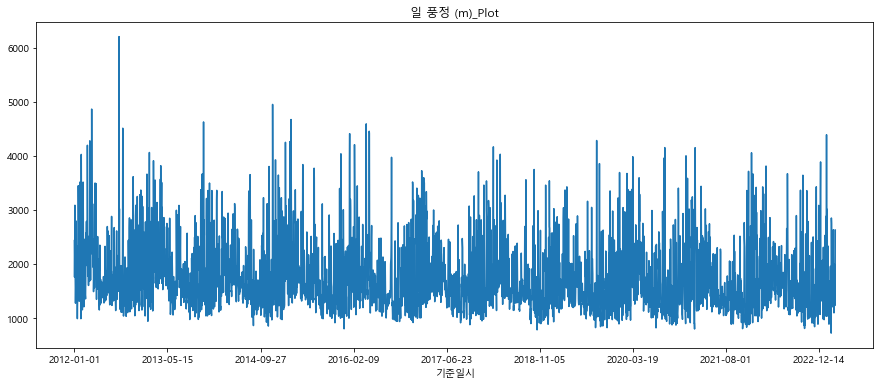

  4%|██▋                                                              | 2/48 [00:00<00:10,  4.52it/s]

결측치 비율(%) :  0.0

1989.421053    2
1694.536842    2
1479.347368    2
1789.130435    2
1029.242105    2
              ..
1366.225806    1
1826.612903    1
1909.817204    1
2906.032258    1
2627.886598    1
Name: 일 풍정 (m), Length: 4078, dtype: int64

count    4089.000000
mean     1755.607584
std       619.357123
min       723.197917
25%      1317.273684
50%      1602.284211
75%      2049.215054
max      6202.000000
Name: 일 풍정 (m), dtype: float64


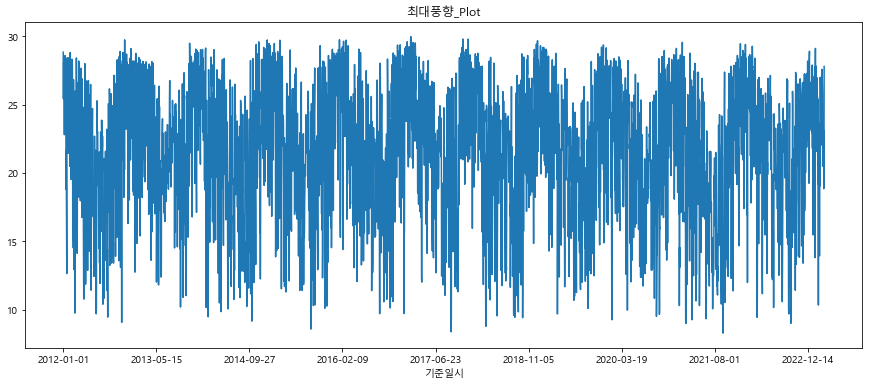

  6%|████                                                             | 3/48 [00:00<00:09,  4.97it/s]

결측치 비율(%) :  0.0

26.500000    7
23.505263    6
21.252632    6
27.568421    6
22.000000    6
            ..
25.638298    1
24.127660    1
25.510638    1
24.117021    1
27.804124    1
Name: 최대풍향, Length: 2970, dtype: int64

count    4089.000000
mean       21.629713
std         4.855800
min         8.273684
25%        18.206522
50%        22.265957
75%        25.604167
max        29.989474
Name: 최대풍향, dtype: float64


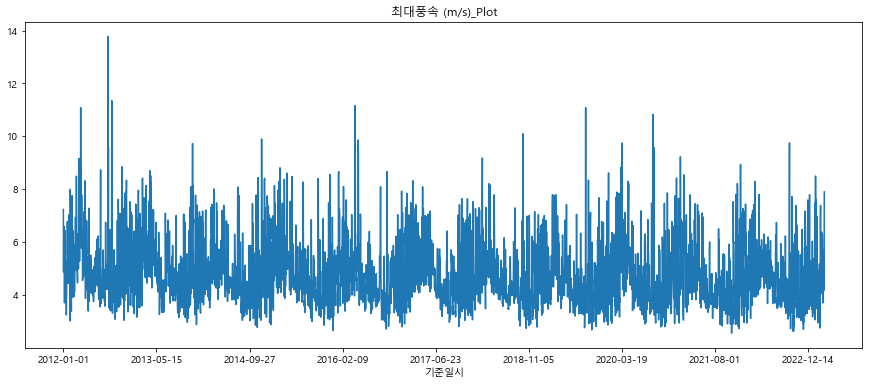

  8%|█████▍                                                           | 4/48 [00:00<00:08,  5.34it/s]

결측치 비율(%) :  0.0

4.300000    5
4.275789    4
4.089474    4
3.984211    4
4.200000    4
           ..
4.188298    1
4.369149    1
4.407447    1
4.510638    1
7.902062    1
Name: 최대풍속 (m/s), Length: 3545, dtype: int64

count    4089.000000
mean        4.833674
std         1.225166
min         2.561053
25%         3.965263
50%         4.583158
75%         5.458947
max        13.769565
Name: 최대풍속 (m/s), dtype: float64


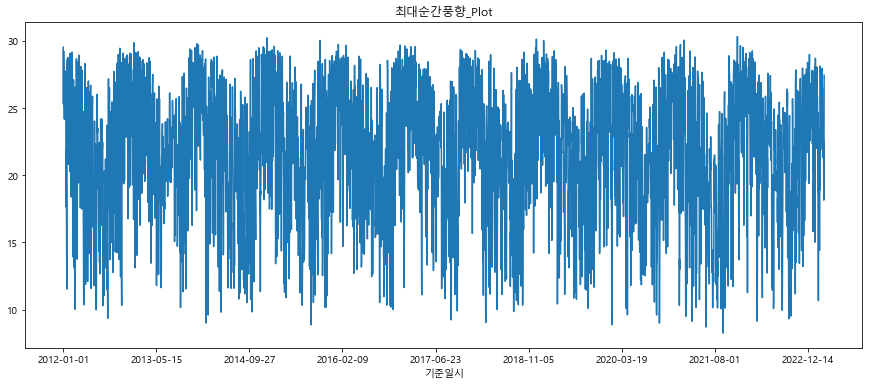

 10%|██████▊                                                          | 5/48 [00:00<00:07,  5.49it/s]

결측치 비율(%) :  0.0

21.578947    7
23.000000    6
22.052632    6
23.715789    6
25.147368    5
            ..
23.287234    1
26.989362    1
20.095745    1
18.074468    1
27.463918    1
Name: 최대순간풍향, Length: 2975, dtype: int64

count    4089.000000
mean       21.729143
std         4.936936
min         8.242105
25%        18.297872
50%        22.478723
75%        25.705263
max        30.336842
Name: 최대순간풍향, dtype: float64


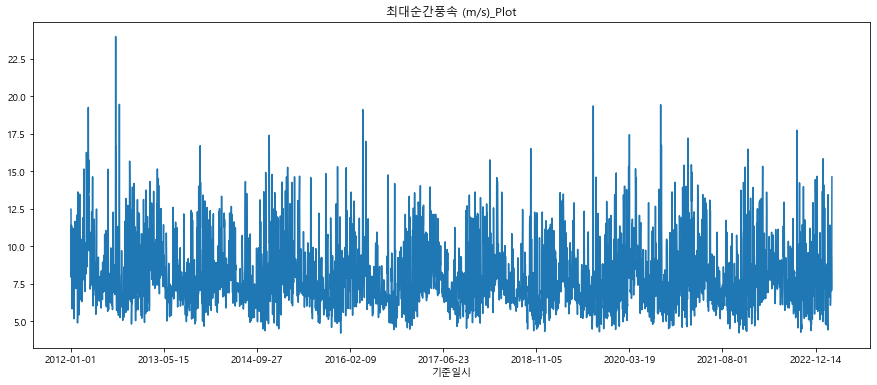

 12%|████████▏                                                        | 6/48 [00:01<00:07,  5.60it/s]

결측치 비율(%) :  0.0

5.683158     3
8.000000     3
6.071579     3
5.786316     3
5.310526     3
            ..
7.789247     1
6.639785     1
4.867742     1
5.244086     1
14.634021    1
Name: 최대순간풍속 (m/s), Length: 3753, dtype: int64

count    4089.000000
mean        8.106540
std         2.263064
min         4.219149
25%         6.501042
50%         7.597849
75%         9.246316
max        23.988043
Name: 최대순간풍속 (m/s), dtype: float64


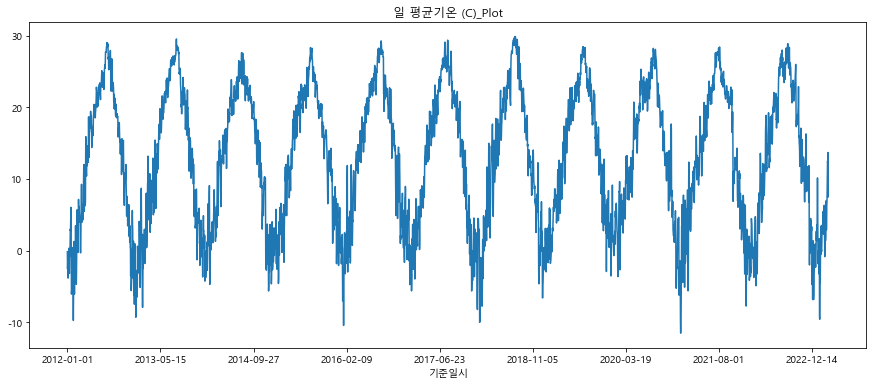

 15%|█████████▍                                                       | 7/48 [00:01<00:12,  3.17it/s]

결측치 비율(%) :  0.0

26.909474    2
19.629474    2
12.817895    2
4.538298     2
12.816129    2
            ..
20.418280    1
20.474194    1
19.990323    1
19.679570    1
7.500000     1
Name: 일 평균기온 (C), Length: 4020, dtype: int64

count    4089.000000
mean       12.991539
std         9.502720
min       -11.518947
25%         4.664894
50%        13.408511
75%        21.377083
max        29.852632
Name: 일 평균기온 (C), dtype: float64


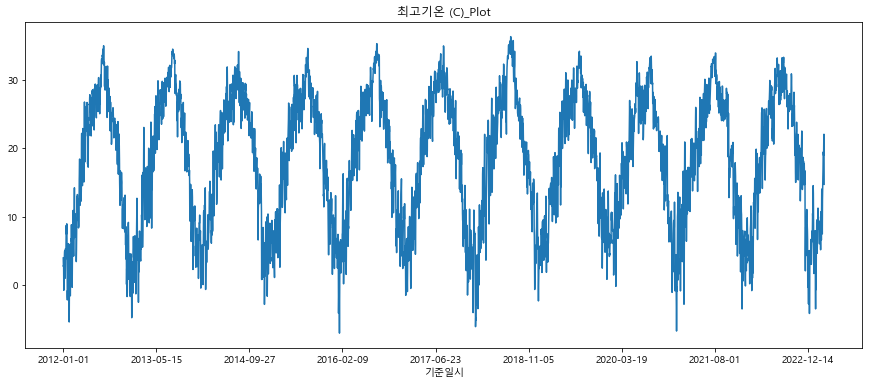

 17%|██████████▊                                                      | 8/48 [00:01<00:10,  3.83it/s]

결측치 비율(%) :  0.0

21.183158    3
25.090426    3
26.643750    2
18.640625    2
9.600000     2
            ..
25.386022    1
23.854839    1
24.000000    1
26.097849    1
14.719588    1
Name: 최고기온 (C), Length: 4009, dtype: int64

count    4089.000000
mean       18.417952
std         9.463590
min        -7.010638
25%        10.278947
50%        19.669474
75%        26.664894
max        36.296842
Name: 최고기온 (C), dtype: float64


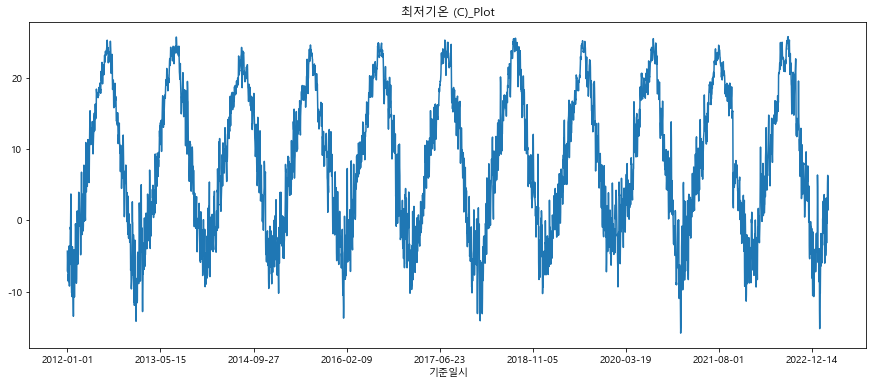

 19%|████████████▏                                                    | 9/48 [00:02<00:08,  4.44it/s]

결측치 비율(%) :  0.0

 19.374737    3
 18.615054    2
 18.490526    2
-1.150000     2
 19.676596    2
             ..
 15.386022    1
 13.949462    1
 13.164516    1
 14.536559    1
 1.471134     1
Name: 최저기온 (C), Length: 4014, dtype: int64

count    4089.000000
mean        8.290491
std         9.956608
min       -15.829474
25%        -0.342391
50%         8.163830
75%        17.363158
max        25.743158
Name: 최저기온 (C), dtype: float64


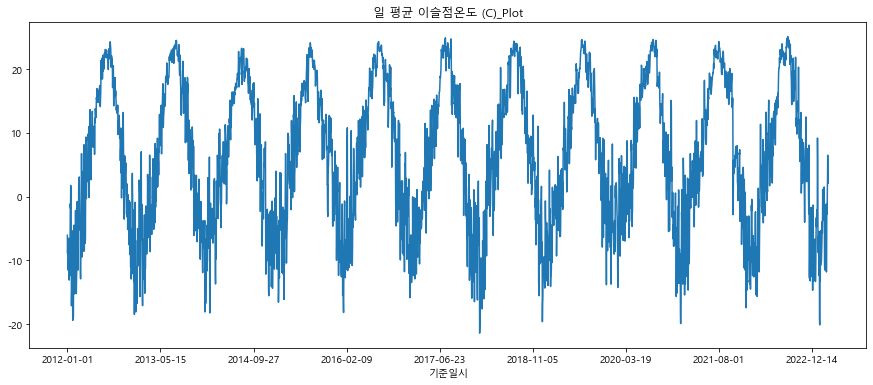

 21%|█████████████▎                                                  | 10/48 [00:02<00:07,  4.89it/s]

결측치 비율(%) :  0.0

14.464211    2
23.675789    2
9.684211     2
22.694681    2
24.273684    2
            ..
7.979570     1
9.562366     1
9.997802     1
11.653763    1
2.117526     1
Name: 일 평균 이슬점온도 (C), Length: 4021, dtype: int64

count    4089.000000
mean        6.544628
std        11.151174
min       -21.395789
25%        -2.650000
50%         6.750526
75%        16.565957
max        25.105208
Name: 일 평균 이슬점온도 (C), dtype: float64


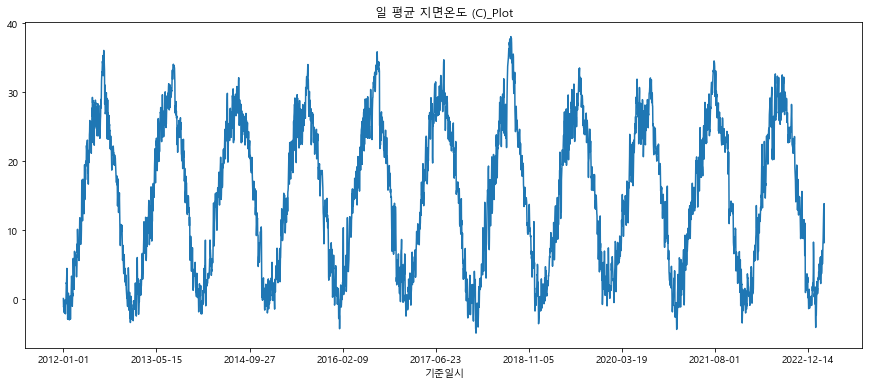

 23%|██████████████▋                                                 | 11/48 [00:02<00:07,  5.20it/s]

결측치 비율(%) :  0.0

23.451064    2
10.611579    2
26.350000    2
22.320213    2
0.482979     2
            ..
24.584946    1
20.312903    1
22.659140    1
23.089247    1
8.182474     1
Name: 일 평균 지면온도 (C), Length: 4023, dtype: int64

count    4089.000000
mean       15.138443
std        10.618523
min        -4.940000
25%         4.945263
50%        15.395699
75%        24.713830
max        38.030526
Name: 일 평균 지면온도 (C), dtype: float64


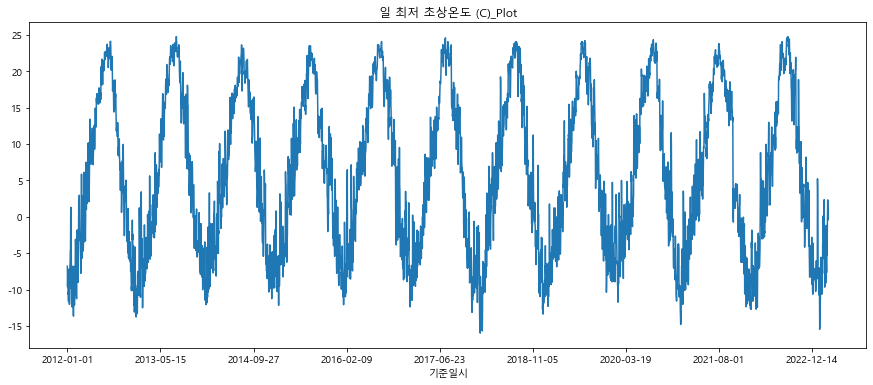

 25%|████████████████                                                | 12/48 [00:02<00:06,  5.27it/s]

결측치 비율(%) :  0.0

-5.374468     3
-1.556989     2
 22.205435    2
 23.262766    2
-4.004211     2
             ..
 12.183871    1
 13.510753    1
 14.759140    1
 14.252688    1
-0.173196     1
Name: 일 최저 초상온도 (C), Length: 4010, dtype: int64

count    4089.000000
mean        5.883239
std        10.723066
min       -15.996842
25%        -3.723158
50%         5.268817
75%        15.666316
max        24.786957
Name: 일 최저 초상온도 (C), dtype: float64


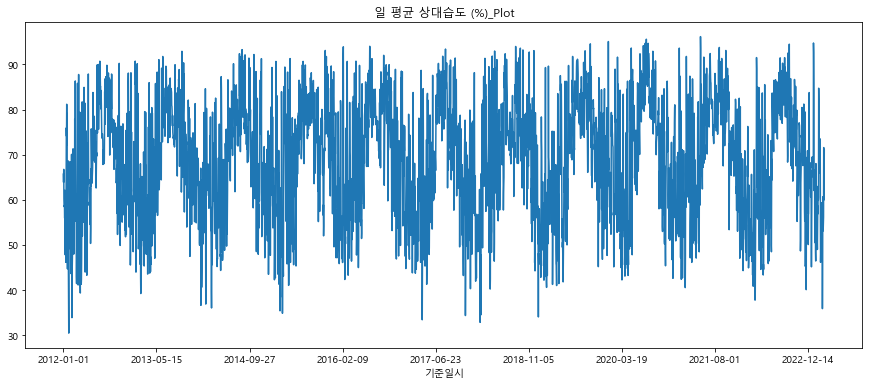

 27%|█████████████████▎                                              | 13/48 [00:02<00:06,  5.31it/s]

결측치 비율(%) :  0.0

76.007447    2
78.694737    2
75.241053    2
74.915789    2
56.636170    2
            ..
68.081720    1
61.524731    1
67.317204    1
69.273626    1
71.031959    1
Name: 일 평균 상대습도 (%), Length: 4038, dtype: int64

count    4089.000000
mean       68.716253
std        12.639594
min        30.468817
25%        59.000000
50%        69.941489
75%        78.517895
max        96.160215
Name: 일 평균 상대습도 (%), dtype: float64


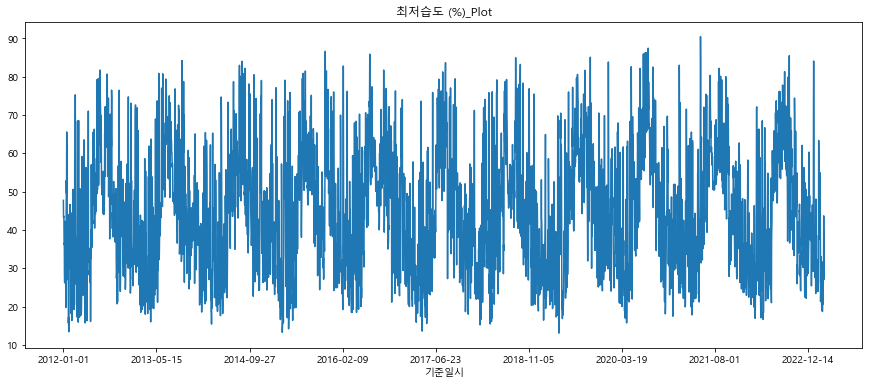

 29%|██████████████████▋                                             | 14/48 [00:02<00:06,  5.35it/s]

결측치 비율(%) :  0.0

23.000000    4
41.178947    4
55.863158    3
42.400000    3
33.294737    3
            ..
63.193548    1
46.387097    1
39.225806    1
36.537634    1
40.020619    1
Name: 최저습도 (%), Length: 3688, dtype: int64

count    4089.000000
mean       44.302351
std        15.681990
min        13.062500
25%        31.666667
50%        42.810526
75%        55.372340
max        90.457447
Name: 최저습도 (%), dtype: float64


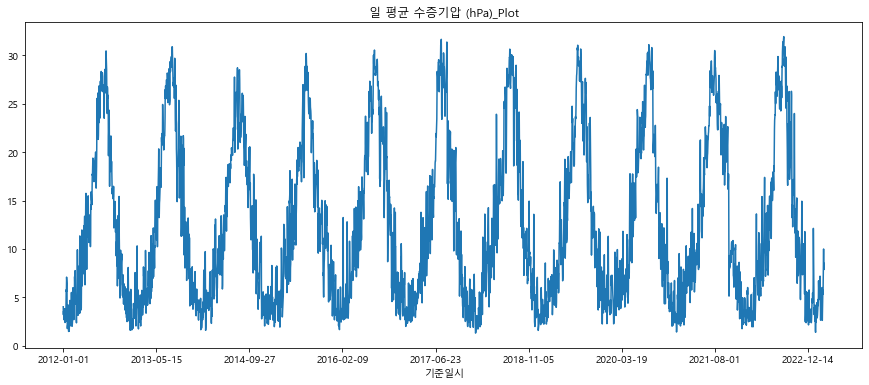

 31%|████████████████████                                            | 15/48 [00:03<00:05,  5.62it/s]

결측치 비율(%) :  0.0

9.718947     3
6.645263     3
26.355789    2
7.523958     2
21.170213    2
            ..
18.408602    1
18.023656    1
15.944086    1
14.415217    1
7.895876     1
Name: 일 평균 수증기압 (hPa), Length: 3988, dtype: int64

count    4089.000000
mean       12.474776
std         8.311197
min         1.305263
25%         5.256842
50%        10.055789
75%        19.035870
max        31.946875
Name: 일 평균 수증기압 (hPa), dtype: float64


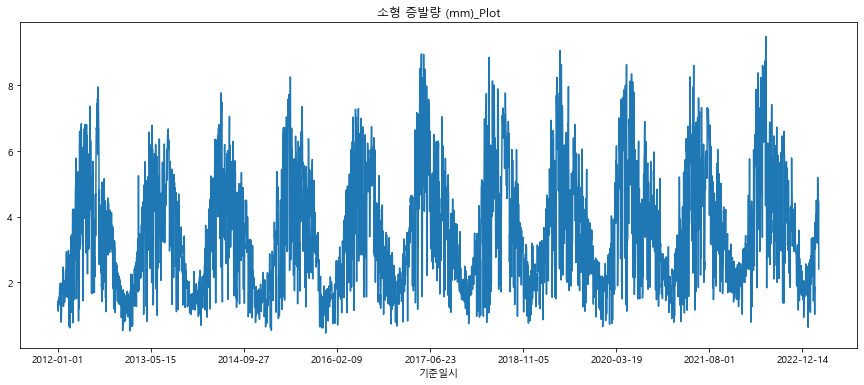

 33%|█████████████████████▎                                          | 16/48 [00:03<00:05,  5.80it/s]

결측치 비율(%) :  0.0

1.900000    7
1.650000    6
1.525000    6
2.295000    5
3.105000    5
           ..
5.823810    1
5.614286    1
4.602381    1
6.328571    1
2.409434    1
Name: 소형 증발량 (mm), Length: 3228, dtype: int64

count    4089.000000
mean        3.552150
std         1.768075
min         0.456250
25%         2.072727
50%         3.245238
75%         4.825000
max         9.487500
Name: 소형 증발량 (mm), dtype: float64


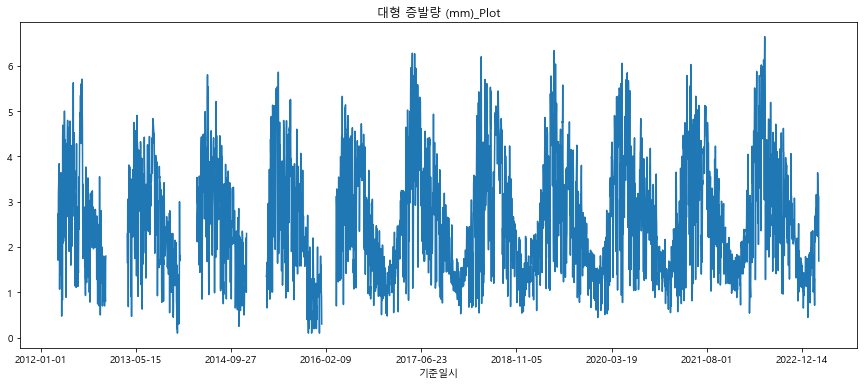

 35%|██████████████████████▋                                         | 17/48 [00:03<00:05,  5.63it/s]

결측치 비율(%) :  11.4

1.000000    14
1.300000    12
0.900000    12
1.100000    11
1.600000    11
            ..
1.864286     1
2.164286     1
2.902439     1
3.839024     1
1.690566     1
Name: 대형 증발량 (mm), Length: 2780, dtype: int64

count    3623.000000
mean        2.628661
std         1.241145
min         0.100000
25%         1.600000
50%         2.445000
75%         3.532576
max         6.643750
Name: 대형 증발량 (mm), dtype: float64


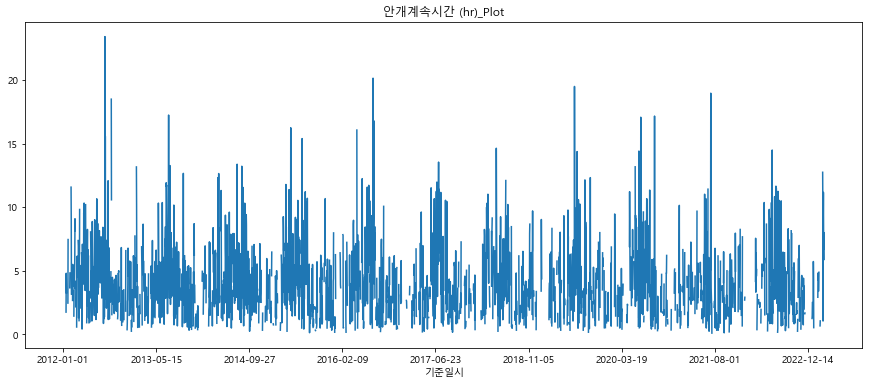

 38%|████████████████████████                                        | 18/48 [00:03<00:05,  5.81it/s]

결측치 비율(%) :  39.5

1.330000    22
0.830000    19
1.830000    18
0.500000    18
1.170000    17
            ..
2.183750     1
3.638333     1
4.105000     1
2.696000     1
5.894000     1
Name: 안개계속시간 (hr), Length: 1590, dtype: int64

count    2474.000000
mean        4.037291
std         2.827563
min         0.100000
25%         1.917500
50%         3.508889
75%         5.463571
max        23.420000
Name: 안개계속시간 (hr), dtype: float64


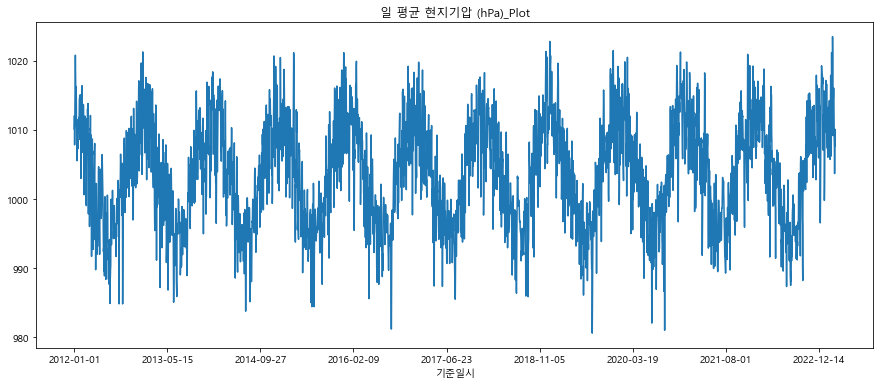

 40%|█████████████████████████▎                                      | 19/48 [00:03<00:04,  5.81it/s]

결측치 비율(%) :  0.0

994.604255     3
1001.300000    3
1009.269474    3
1010.415789    2
995.453684     2
              ..
998.723913     1
1002.285870    1
1006.290110    1
1010.727174    1
1007.671134    1
Name: 일 평균 현지기압 (hPa), Length: 4000, dtype: int64

count    4089.000000
mean     1003.855621
std         7.505066
min       980.589474
25%       998.008511
50%      1004.183158
75%      1009.665591
max      1023.504124
Name: 일 평균 현지기압 (hPa), dtype: float64


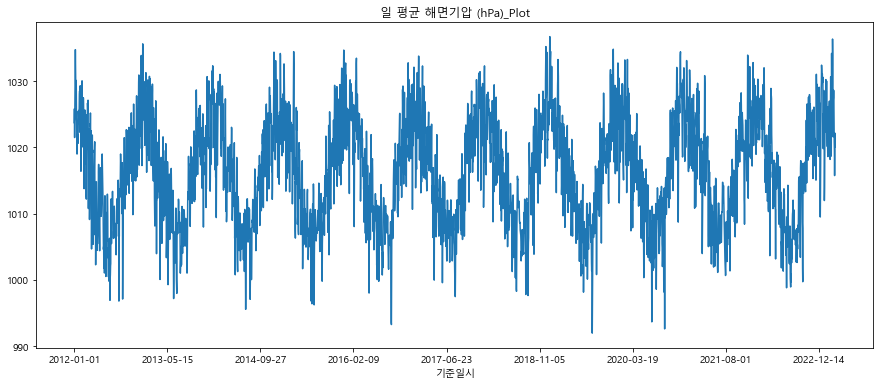

 42%|██████████████████████████▋                                     | 20/48 [00:03<00:04,  5.74it/s]

결측치 비율(%) :  0.0

1024.745263    3
1022.493548    2
1009.777660    2
1019.087500    2
1019.464211    2
              ..
1010.910753    1
1007.198913    1
1007.709783    1
1011.169565    1
1020.029897    1
Name: 일 평균 해면기압 (hPa), Length: 3995, dtype: int64

count    4089.000000
mean     1016.476725
std         7.961445
min       991.976842
25%      1010.138947
50%      1016.835417
75%      1022.668421
max      1036.707368
Name: 일 평균 해면기압 (hPa), dtype: float64


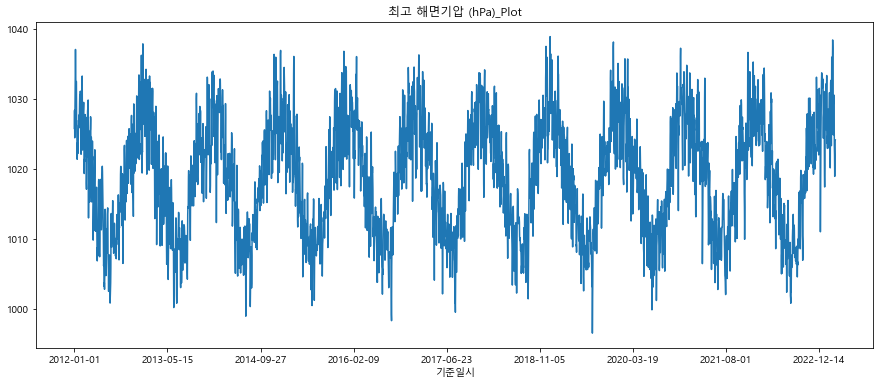

 44%|████████████████████████████                                    | 21/48 [00:04<00:04,  5.81it/s]

결측치 비율(%) :  0.0

1008.000000    3
1016.693684    3
1027.772632    3
1022.995789    3
1028.100000    3
              ..
1023.187097    1
1023.058065    1
1019.953763    1
1017.820430    1
1024.150515    1
Name: 최고 해면기압 (hPa), Length: 3998, dtype: int64

count    4089.000000
mean     1019.211891
std         7.990989
min       996.541053
25%      1012.474737
50%      1019.790426
75%      1025.513684
max      1038.910526
Name: 최고 해면기압 (hPa), dtype: float64


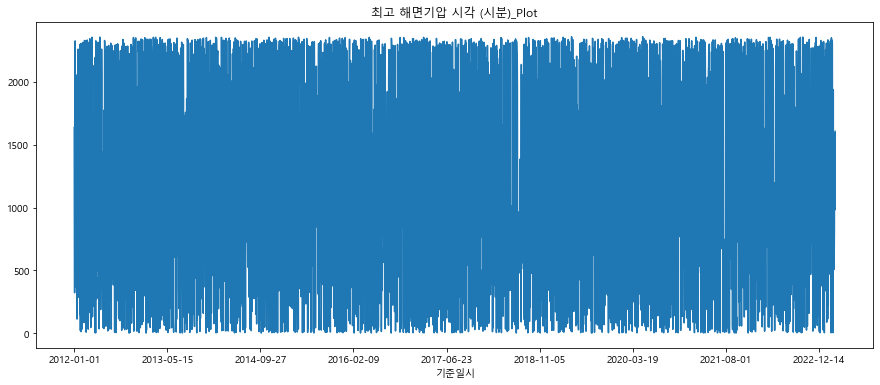

 46%|█████████████████████████████▎                                  | 22/48 [00:04<00:04,  5.30it/s]

결측치 비율(%) :  0.0

36.863158      2
4.557895       2
2260.075269    2
93.231579      2
2337.621053    2
              ..
2076.228261    1
2303.358696    1
2142.923913    1
2212.619565    1
1606.278351    1
Name: 최고 해면기압 시각 (시분), Length: 4065, dtype: int64

count    4089.000000
mean     1158.749966
std       810.819779
min         1.141304
25%       476.319149
50%       948.574468
75%      2060.191489
max      2359.736842
Name: 최고 해면기압 시각 (시분), dtype: float64


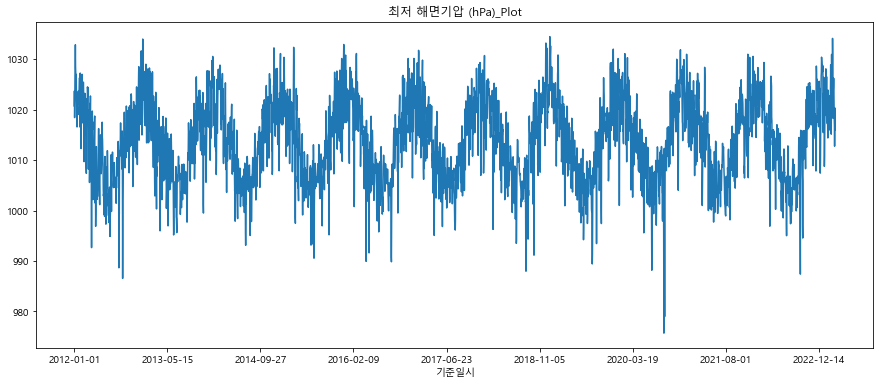

 48%|██████████████████████████████▋                                 | 23/48 [00:04<00:04,  5.45it/s]

결측치 비율(%) :  0.0

1008.037234    2
1018.489474    2
1008.207527    2
1012.269474    2
1017.774737    2
              ..
1011.408602    1
1012.511828    1
1013.820430    1
1008.035484    1
1016.045361    1
Name: 최저 해면기압 (hPa), Length: 4007, dtype: int64

count    4089.000000
mean     1013.785943
std         8.040978
min       975.713684
25%      1007.754348
50%      1013.937234
75%      1020.000000
max      1034.492632
Name: 최저 해면기압 (hPa), dtype: float64


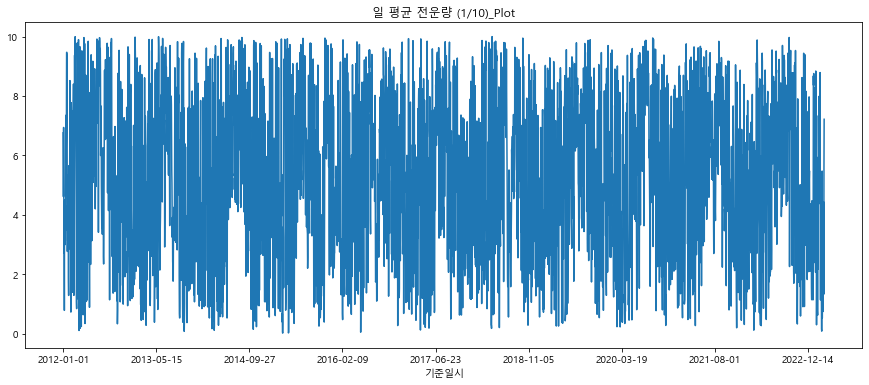

 50%|████████████████████████████████                                | 24/48 [00:04<00:04,  5.46it/s]

결측치 비율(%) :  0.0

5.777500    5
4.000000    5
2.481818    4
5.136364    4
4.254545    4
           ..
4.277273    1
4.127273    1
2.995455    1
8.354545    1
7.215464    1
Name: 일 평균 전운량 (1/10), Length: 3622, dtype: int64

count    4089.000000
mean        5.161441
std         2.597324
min         0.013725
25%         3.129167
50%         5.068085
75%         7.317500
max        10.000000
Name: 일 평균 전운량 (1/10), dtype: float64


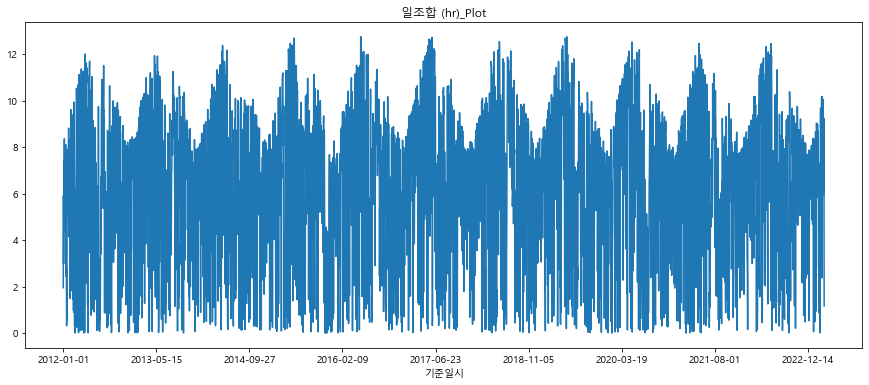

 52%|█████████████████████████████████▎                              | 25/48 [00:04<00:04,  5.41it/s]

결측치 비율(%) :  0.0

6.596842    3
8.386316    3
7.715789    3
7.885263    3
3.259140    3
           ..
4.497849    1
1.487097    1
0.059140    1
7.139785    1
1.168041    1
Name: 일조합 (hr), Length: 3893, dtype: int64

count    4089.000000
mean        6.276245
std         3.247345
min         0.001064
25%         3.837500
50%         6.847826
75%         8.755435
max        12.758511
Name: 일조합 (hr), dtype: float64


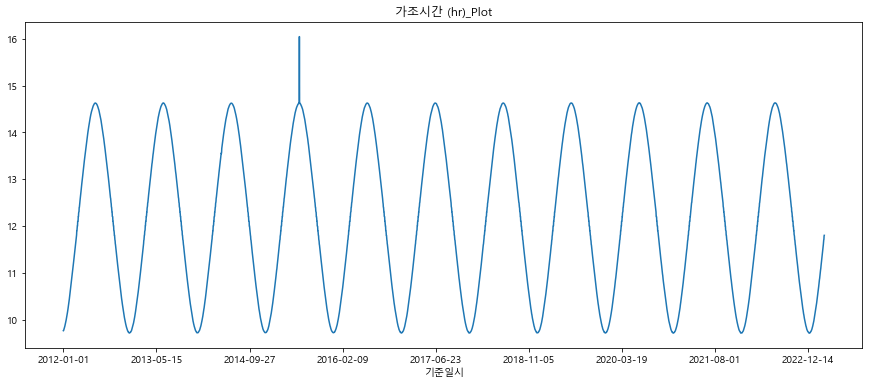

 54%|██████████████████████████████████▋                             | 26/48 [00:05<00:03,  5.72it/s]

결측치 비율(%) :  0.0

12.000000    44
12.200000    36
12.100000    35
12.300000    28
11.900000    26
             ..
14.565591     1
14.554839     1
14.547312     1
14.537634     1
11.787629     1
Name: 가조시간 (hr), Length: 3333, dtype: int64

count    4089.000000
mean       12.167472
std         1.691298
min         9.709375
25%        10.529474
50%        12.163441
75%        13.810753
max        16.048387
Name: 가조시간 (hr), dtype: float64


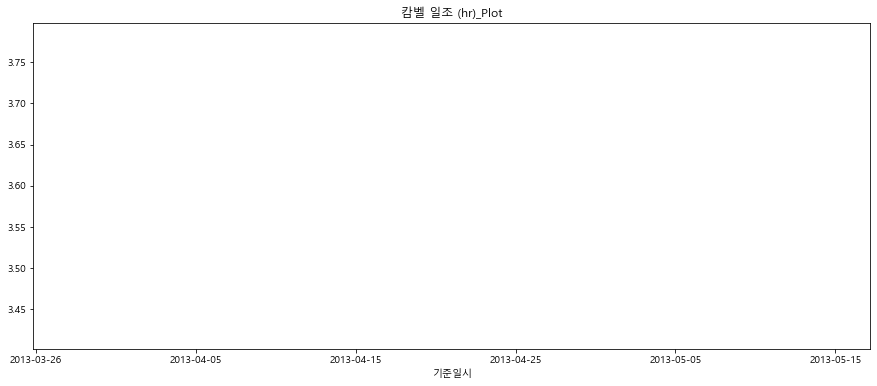

 56%|████████████████████████████████████                            | 27/48 [00:05<00:03,  5.38it/s]

결측치 비율(%) :  99.98

3.6    1
Name: 캄벨 일조 (hr), dtype: int64

count    1.0
mean     3.6
std      NaN
min      3.6
25%      3.6
50%      3.6
75%      3.6
max      3.6
Name: 캄벨 일조 (hr), dtype: float64


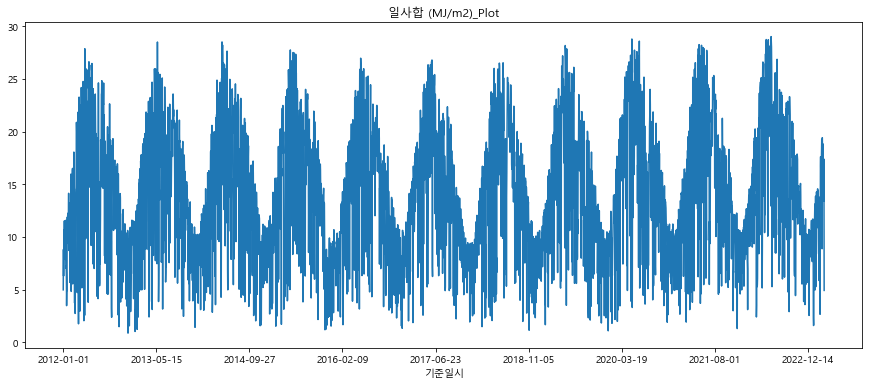

 58%|█████████████████████████████████████▎                          | 28/48 [00:05<00:03,  5.32it/s]

결측치 비율(%) :  0.0

7.417442     2
11.758378    2
9.637632     2
10.598571    2
9.247447     2
            ..
16.103947    1
15.020789    1
17.173947    1
17.347105    1
4.943396     1
Name: 일사합 (MJ/m2), Length: 4079, dtype: int64

count    4089.000000
mean       13.913223
std         6.215152
min         0.889730
25%         9.236042
50%        13.247297
75%        18.718723
max        29.037500
Name: 일사합 (MJ/m2), dtype: float64


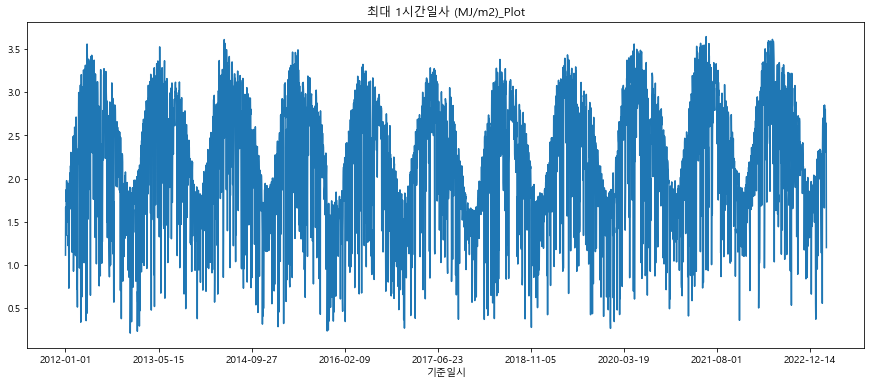

 60%|██████████████████████████████████████▋                         | 29/48 [00:05<00:03,  5.42it/s]

결측치 비율(%) :  0.0

3.160000    4
1.668378    4
3.307447    3
2.949574    3
2.787027    3
           ..
1.045897    1
1.368974    1
0.578462    1
1.278974    1
1.199811    1
Name: 최대 1시간일사 (MJ/m2), Length: 3957, dtype: int64

count    4089.000000
mean        2.175808
std         0.725990
min         0.208649
25%         1.687568
50%         2.193684
75%         2.780714
max         3.644468
Name: 최대 1시간일사 (MJ/m2), dtype: float64


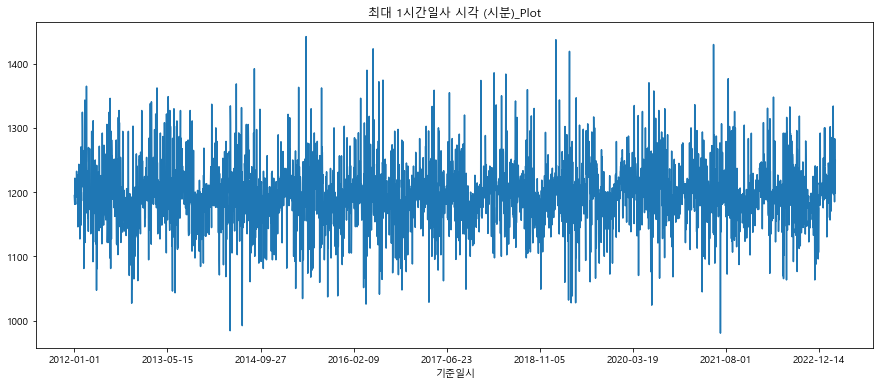

 62%|████████████████████████████████████████                        | 30/48 [00:05<00:03,  5.47it/s]

결측치 비율(%) :  0.0

1200.000000    188
1206.382979     38
1205.405405     37
1202.127660     34
1204.255319     32
              ... 
1275.000000      1
1135.000000      1
1210.000000      1
1205.000000      1
1249.056604      1
Name: 최대 1시간일사 시각 (시분), Length: 909, dtype: int64

count    4089.000000
mean     1197.439246
std        46.419305
min       980.434783
25%      1176.086957
50%      1197.872340
75%      1217.021277
max      1442.105263
Name: 최대 1시간일사 시각 (시분), dtype: float64


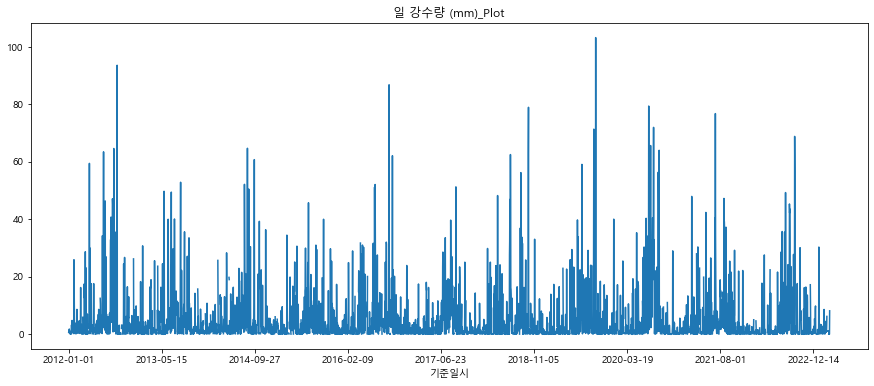

 65%|█████████████████████████████████████████▎                      | 31/48 [00:05<00:03,  5.57it/s]

결측치 비율(%) :  11.71

0.000000     329
0.100000      44
0.050000      28
0.500000      22
0.200000      21
            ... 
2.193478       1
2.261905       1
15.143011      1
0.082609       1
8.117526       1
Name: 일 강수량 (mm), Length: 2671, dtype: int64

count    3610.000000
mean        5.063177
std         9.493925
min         0.000000
25%         0.278333
50%         1.424500
75%         5.077165
max       103.246316
Name: 일 강수량 (mm), dtype: float64


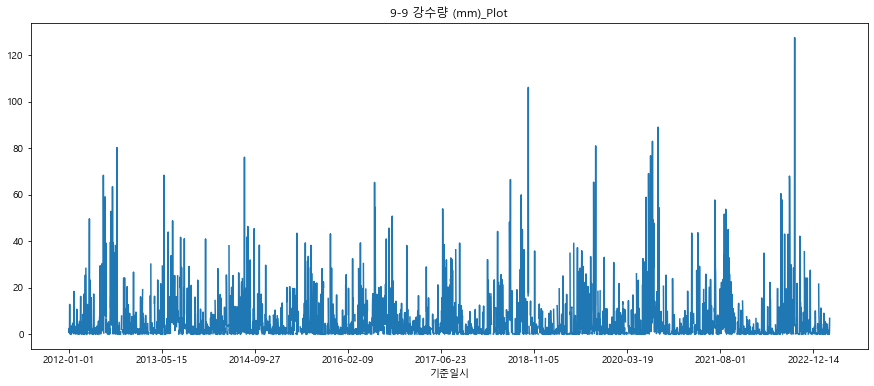

 67%|██████████████████████████████████████████▋                     | 32/48 [00:06<00:02,  5.72it/s]

결측치 비율(%) :  15.82

0.000000     410
0.100000      44
0.050000      38
0.500000      33
0.300000      30
            ... 
43.194737      1
6.415789       1
3.918750       1
15.327778      1
1.238462       1
Name: 9-9 강수량 (mm), Length: 2023, dtype: int64

count    3442.000000
mean        5.730325
std        10.091005
min         0.000000
25%         0.300000
50%         1.760985
75%         6.400000
max       127.695238
Name: 9-9 강수량 (mm), dtype: float64


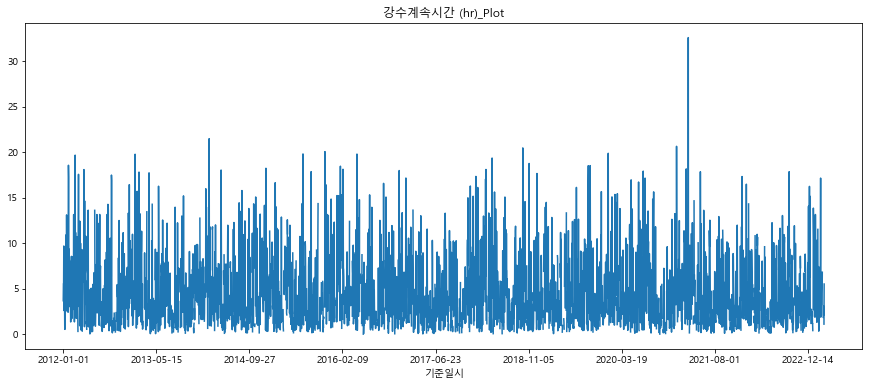

 69%|████████████████████████████████████████████                    | 33/48 [00:06<00:02,  5.67it/s]

결측치 비율(%) :  14.99

0.170000    19
0.500000    15
0.330000    14
1.000000    12
0.750000    11
            ..
6.244211     1
5.893750     1
8.432222     1
9.257333     1
5.534348     1
Name: 강수계속시간 (hr), Length: 3026, dtype: int64

count    3476.000000
mean        4.546958
std         3.807026
min         0.030000
25%         1.671500
50%         3.392500
75%         6.474804
max        32.604783
Name: 강수계속시간 (hr), dtype: float64


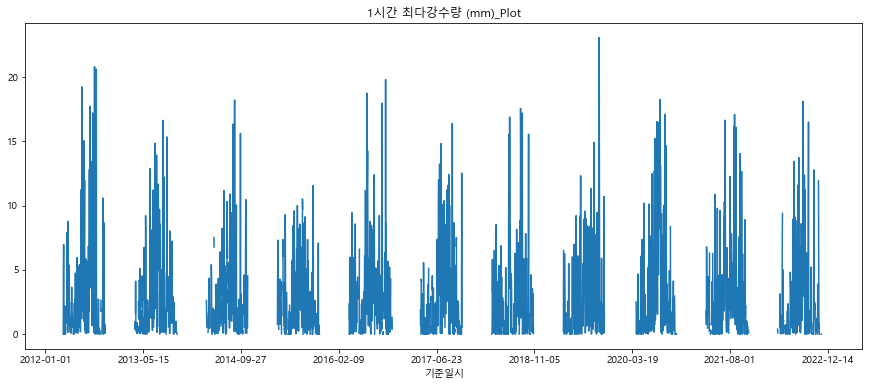

 71%|█████████████████████████████████████████████▎                  | 34/48 [00:06<00:02,  5.89it/s]

결측치 비율(%) :  49.25

0.000000    163
0.100000     38
0.050000     21
0.033333     18
0.500000     11
           ... 
3.541667      1
2.835556      1
1.890909      1
1.290625      1
0.853333      1
Name: 1시간 최다강수량 (mm), Length: 1646, dtype: int64

count    2075.000000
mean        3.002849
std         3.704452
min         0.000000
25%         0.370000
50%         1.557447
75%         4.407802
max        23.068421
Name: 1시간 최다강수량 (mm), dtype: float64


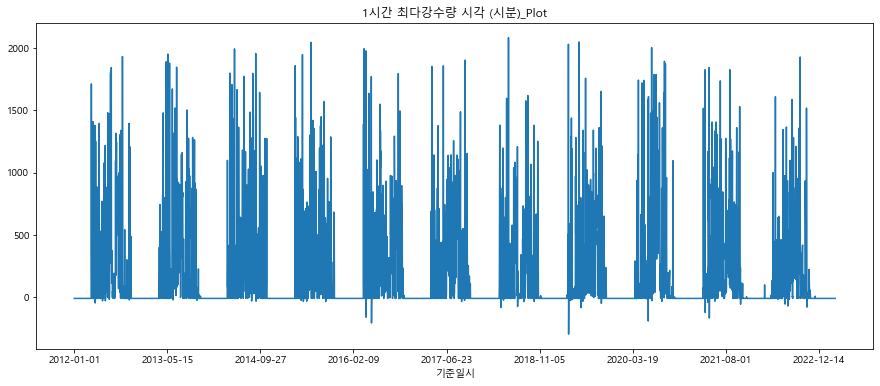

 73%|██████████████████████████████████████████████▋                 | 35/48 [00:06<00:02,  6.02it/s]

결측치 비율(%) :  0.0

-9.000000      2272
 13.410526        3
-8.893617         3
-33.631579        2
-8.817204         2
               ... 
 165.301075       1
 8.752688         1
 17.021505        1
 14.872340        1
 8.906250         1
Name: 1시간 최다강수량 시각 (시분), Length: 1808, dtype: int64

count    4089.000000
mean      173.629978
std       364.609434
min      -295.437500
25%        -9.000000
50%        -9.000000
75%       171.863158
max      2082.968421
Name: 1시간 최다강수량 시각 (시분), dtype: float64


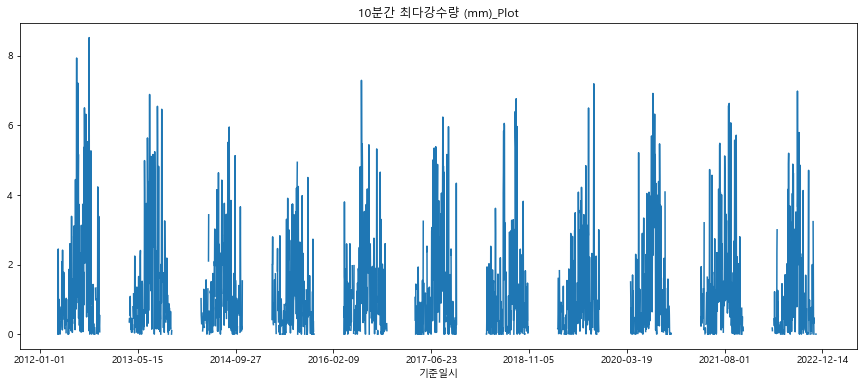

 75%|████████████████████████████████████████████████                | 36/48 [00:06<00:01,  6.17it/s]

결측치 비율(%) :  49.25

0.000000    166
0.100000     38
0.050000     23
0.033333     22
0.300000     17
           ... 
0.758333      1
0.961111      1
1.520000      1
0.383333      1
0.473333      1
Name: 10분간 최다강수량 (mm), Length: 1575, dtype: int64

count    2075.000000
mean        1.272732
std         1.440494
min         0.000000
25%         0.210795
50%         0.745313
75%         1.822569
max         8.523077
Name: 10분간 최다강수량 (mm), dtype: float64


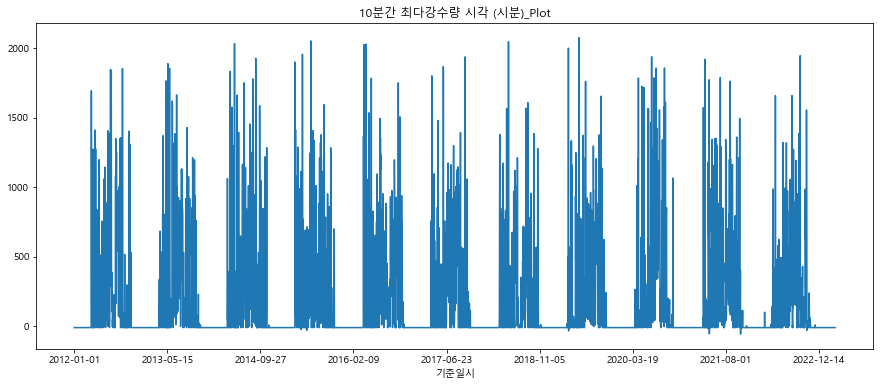

 77%|█████████████████████████████████████████████████▎              | 37/48 [00:06<00:01,  6.24it/s]

결측치 비율(%) :  0.0

-9.000000      2280
 43.873684        2
 11.468750        2
 39.083333        2
 13.521739        2
               ... 
 884.086022       1
 170.967742       1
 8.806452         1
 17.376344        1
 9.843750         1
Name: 10분간 최다강수량 시각 (시분), Length: 1798, dtype: int64

count    4089.000000
mean      173.848253
std       360.856059
min       -55.747368
25%        -9.000000
50%        -9.000000
75%       172.147368
max      2075.281250
Name: 10분간 최다강수량 시각 (시분), dtype: float64


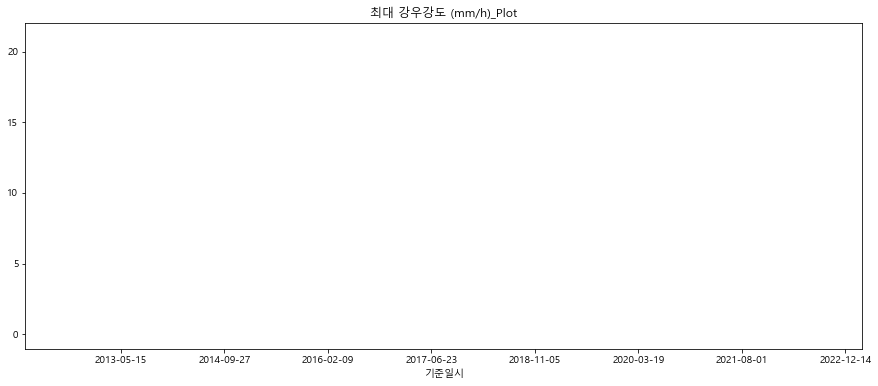

 79%|██████████████████████████████████████████████████▋             | 38/48 [00:07<00:01,  6.43it/s]

결측치 비율(%) :  99.76

0.0     6
0.1     2
17.5    1
21.0    1
Name: 최대 강우강도 (mm/h), dtype: int64

count    10.000000
mean      3.870000
std       8.147945
min       0.000000
25%       0.000000
50%       0.000000
75%       0.100000
max      21.000000
Name: 최대 강우강도 (mm/h), dtype: float64


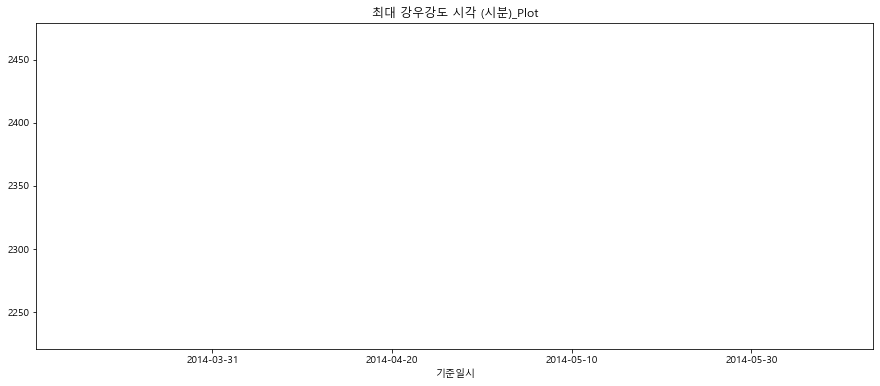

 81%|████████████████████████████████████████████████████            | 39/48 [00:07<00:01,  6.70it/s]

결측치 비율(%) :  99.98

2350.0    1
Name: 최대 강우강도 시각 (시분), dtype: int64

count       1.0
mean     2350.0
std         NaN
min      2350.0
25%      2350.0
50%      2350.0
75%      2350.0
max      2350.0
Name: 최대 강우강도 시각 (시분), dtype: float64


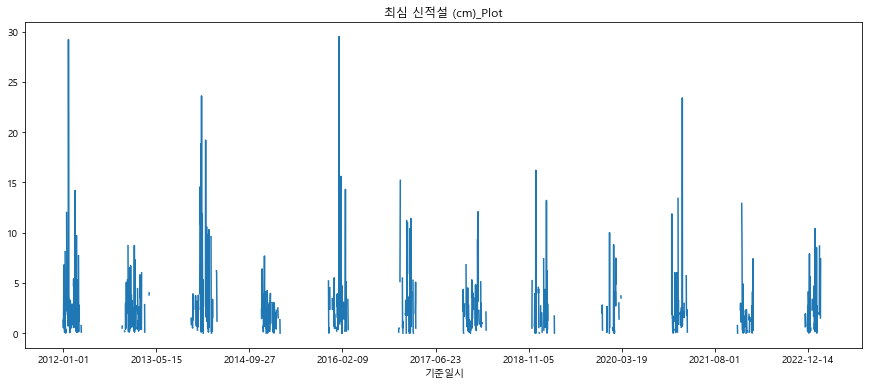

 83%|█████████████████████████████████████████████████████▎          | 40/48 [00:07<00:01,  6.45it/s]

결측치 비율(%) :  82.05

0.000000     35
0.100000     28
0.200000     25
0.300000     22
0.500000     20
             ..
1.577778      1
9.600000      1
10.300000     1
7.200000      1
5.800000      1
Name: 최심 신적설 (cm), Length: 406, dtype: int64

count    734.000000
mean       2.738954
std        3.489952
min        0.000000
25%        0.570833
50%        1.714167
75%        3.457500
max       29.500000
Name: 최심 신적설 (cm), dtype: float64


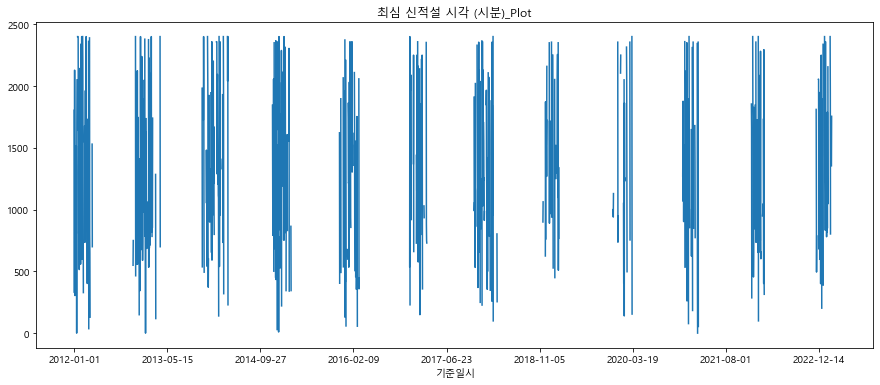

 85%|██████████████████████████████████████████████████████▋         | 41/48 [00:07<00:01,  6.46it/s]

결측치 비율(%) :  82.69

2400.000000    27
2355.000000     9
2250.000000     7
2359.000000     7
2358.000000     5
               ..
2040.000000     1
320.000000      1
1933.333333     1
735.777778      1
40.000000       1
Name: 최심 신적설 시각 (시분), Length: 554, dtype: int64

count     708.000000
mean     1291.637101
std       656.327251
min         1.000000
25%       787.312500
50%      1235.250000
75%      1845.000000
max      2400.000000
Name: 최심 신적설 시각 (시분), dtype: float64


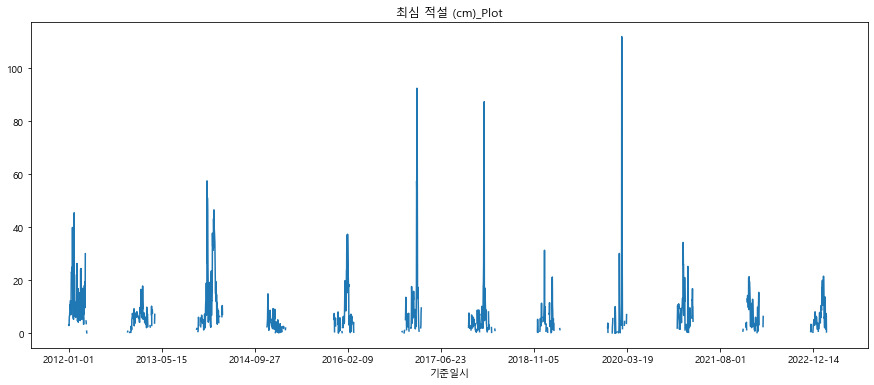

 88%|████████████████████████████████████████████████████████        | 42/48 [00:07<00:00,  6.59it/s]

결측치 비율(%) :  76.13

0.500000     12
0.300000     12
0.200000     11
2.000000     11
0.100000      9
             ..
31.288889     1
33.400000     1
32.083333     1
43.225000     1
5.800000      1
Name: 최심 적설 (cm), Length: 698, dtype: int64

count    976.000000
mean       8.111195
std        9.996732
min        0.000000
25%        2.693750
50%        5.479167
75%        9.505000
max      112.000000
Name: 최심 적설 (cm), dtype: float64


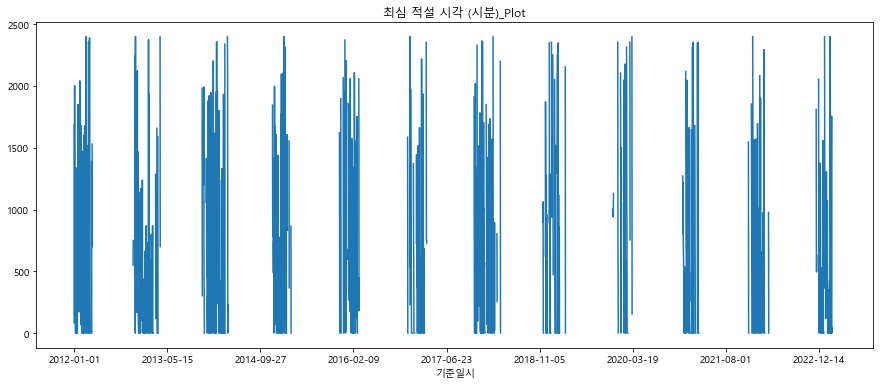

 90%|█████████████████████████████████████████████████████████▎      | 43/48 [00:07<00:00,  6.61it/s]

결측치 비율(%) :  76.16

1.000000       223
0.750000        15
2400.000000     11
0.500000        11
0.666667        10
              ... 
1844.916667      1
904.812500       1
781.421053       1
1414.315789      1
455.000000       1
Name: 최심 적설 시각 (시분), Length: 643, dtype: int64

count     975.000000
mean      654.222583
std       704.091429
min         0.000000
25%         1.000000
50%       444.000000
75%      1080.650000
max      2400.000000
Name: 최심 적설 시각 (시분), dtype: float64


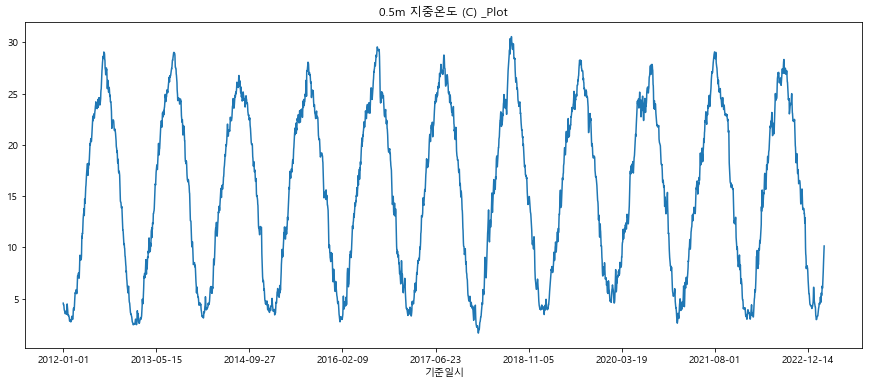

 92%|██████████████████████████████████████████████████████████▋     | 44/48 [00:07<00:00,  6.50it/s]

결측치 비율(%) :  0.0

4.023077     6
4.392308     6
4.100000     5
6.900000     5
4.092308     5
            ..
24.816667    1
25.075000    1
25.333333    1
25.525000    1
10.130769    1
Name: 0.5m 지중온도 (C) , Length: 3206, dtype: int64

count    4089.000000
mean       15.323341
std         8.253806
min         1.630769
25%         7.155000
50%        15.746154
75%        23.069231
max        30.553846
Name: 0.5m 지중온도 (C) , dtype: float64


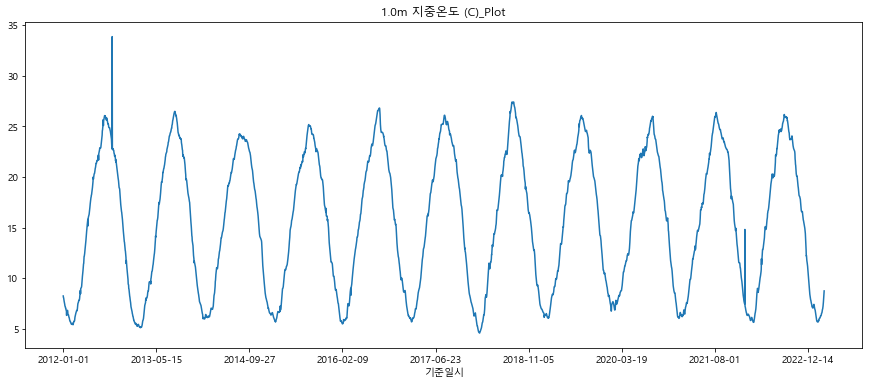

 94%|████████████████████████████████████████████████████████████    | 45/48 [00:08<00:00,  6.49it/s]

결측치 비율(%) :  0.0

19.930769    7
7.000000     6
22.053846    5
12.369231    5
5.800000     5
            ..
7.025000     1
6.900000     1
6.800000     1
6.741667     1
8.746154     1
Name: 1.0m 지중온도 (C), Length: 3047, dtype: int64

count    4089.000000
mean       15.567990
std         6.813646
min         4.576923
25%         8.747368
50%        15.823077
75%        22.100000
max        33.863158
Name: 1.0m 지중온도 (C), dtype: float64


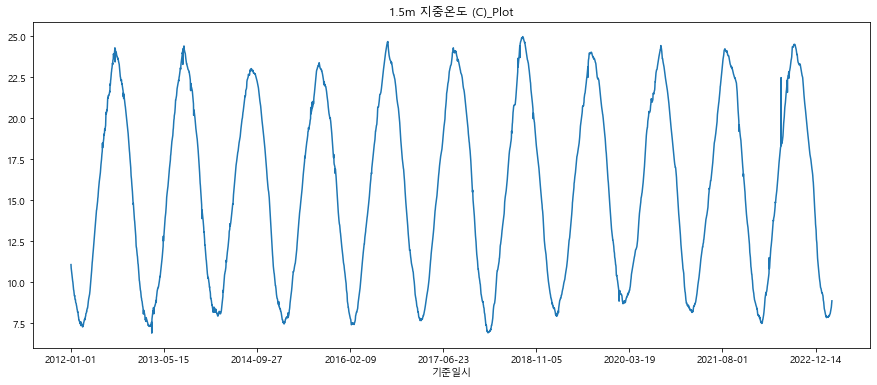

 96%|█████████████████████████████████████████████████████████████▎  | 46/48 [00:08<00:00,  6.30it/s]

결측치 비율(%) :  0.0

8.753846     7
7.961538     6
8.430769     6
8.216667     6
22.758333    6
            ..
20.491667    1
20.708333    1
20.808333    1
20.983333    1
8.492308     1
Name: 1.5m 지중온도 (C), Length: 2521, dtype: int64

count    4089.000000
mean       15.679604
std         5.610052
min         6.907692
25%        10.138462
50%        15.716667
75%        21.030769
max        24.984615
Name: 1.5m 지중온도 (C), dtype: float64


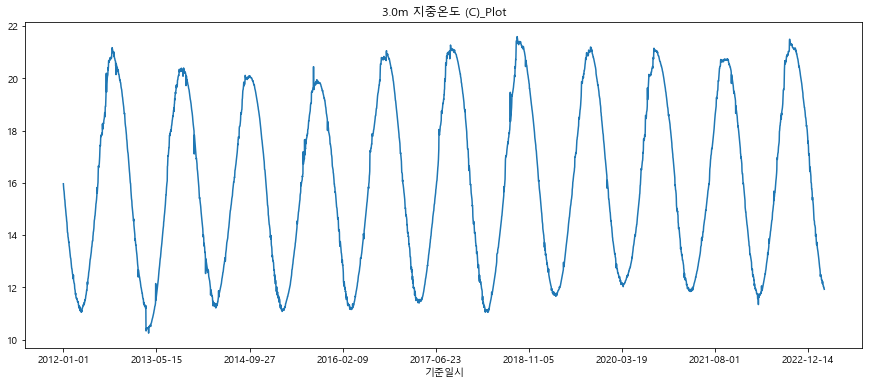

 98%|██████████████████████████████████████████████████████████████▋ | 47/48 [00:08<00:00,  5.74it/s]

결측치 비율(%) :  0.0

20.715385    9
20.723077    9
11.892308    9
12.276923    8
12.130769    8
            ..
18.516667    1
18.591667    1
18.758333    1
18.875000    1
12.730769    1
Name: 3.0m 지중온도 (C), Length: 1910, dtype: int64

count    4089.000000
mean       16.019088
std         3.323417
min        10.253846
25%        12.807692
50%        15.808333
75%        19.269231
max        21.600000
Name: 3.0m 지중온도 (C), dtype: float64


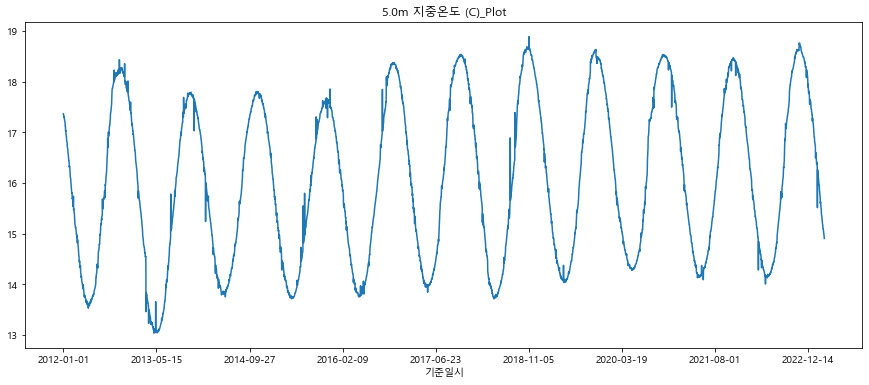

100%|████████████████████████████████████████████████████████████████| 48/48 [00:08<00:00,  5.55it/s]

결측치 비율(%) :  0.0

14.100000    15
18.492308    15
18.453846    15
18.230769    15
13.833333    14
             ..
13.772727     1
14.266667     1
14.416667     1
14.758333     1
15.361538     1
Name: 5.0m 지중온도 (C), Length: 1203, dtype: int64

count    4089.000000
mean       16.069969
std         1.603568
min        13.038462
25%        14.553846
50%        16.023077
75%        17.558333
max        18.892308
Name: 5.0m 지중온도 (C), dtype: float64


In [8]:
value_confirm(day)

In [ ]:
# time 
time['적설(cm)'].fillna(0, inplace=True)
time['강수량(mm)'].fillna(0, inplace=True)
time = delete_80(time)

# day
day = delete_80(day)

# elec

In [ ]:
elec

In [ ]:
display(missing_per(elec).style.applymap(highlight_cells))

In [ ]:
# 결측값을 -999로 채워 어느 부분에 결측값이 있는지 시각적으로 확인

elec.fillna(-999).plot(figsize=(20, 6))

In [ ]:
# 그래프를 보면 시간별 특정 패턴이 있다고 판단되기 때문에, 전력 수요량의 결측값은 바로 앞에 값으로 채우기로 결정

elec_fillna = elec.fillna(method = 'ffill')
elec_fillna.plot(figsize=(20, 6))

# Data Concat